# Predicting CitiBike Demand

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: Data Loading and Preprocessing

### Load Data

In [8]:
df_train = pd.read_csv('data/2024_08/df_train.csv', low_memory=False)
df_weather = pd.read_csv('data/2024_08/weather_data_2024.csv', low_memory=False)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603575 entries, 0 to 4603574
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 456.6+ MB


In [10]:
df_train.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB4E29A011E918E,electric_bike,2024-08-13 22:28:13.065,2024-08-13 22:30:43.138,McKibbin St & Bogart St,5059.02,Wilson Ave & Troutman St,4864.09,40.706237,-73.933871,40.701660,-73.927540,member
1,6389E1E171CE17CD,classic_bike,2024-08-07 09:39:52.489,2024-08-07 09:43:14.975,Bialystoker Pl & Delancey St,5335.03,Norfolk St & Broome St,5374.01,40.716226,-73.982612,40.717227,-73.988021,member
2,3F4BBEBDFB7548C0,electric_bike,2024-08-10 21:04:35.143,2024-08-10 21:21:43.846,Rivington St & Chrystie St,5453.01,Kent Ave & Division Ave,5021.05,40.721101,-73.991925,40.706564,-73.968319,member
3,C0939F0CD7ED731E,classic_bike,2024-08-13 19:21:31.275,2024-08-13 19:33:43.790,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member
4,4CB3950095D804D6,electric_bike,2024-08-09 22:23:42.894,2024-08-09 22:58:04.455,E 34 St & Church Ave,3318.05,48 St & 2 Ave,3283.05,40.651160,-73.945770,40.650176,-74.015606,casual
5,585D1A3FEEF4867E,electric_bike,2024-08-02 16:58:20.753,2024-08-02 17:03:15.327,McKibbin St & Bogart St,5059.02,Suydam St & Broadway,4689.03,40.706237,-73.933871,40.695440,-73.932230,member
6,BAC50AFB465C607B,electric_bike,2024-08-07 23:12:24.982,2024-08-07 23:20:00.458,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member
7,4F4D162103E66917,electric_bike,2024-08-06 15:20:31.886,2024-08-06 15:32:23.192,8 Ave & W 16 St,6072.11,1 Ave & E 39 St,6303.01,40.740983,-74.001702,40.747140,-73.971130,member
8,DE6F03D235645CBF,classic_bike,2024-08-13 18:51:17.796,2024-08-13 19:06:27.537,Graham Ave & Grand St,5178.06,Stanton St & Norfolk St,5445.07,40.711863,-73.944024,40.720747,-73.986274,member
9,BC3A1D7C8884C727,electric_bike,2024-08-05 00:24:16.628,2024-08-05 00:58:38.898,8 Ave & W 16 St,6072.11,5 Ave & W 131 St,7735.05,40.740983,-74.001702,40.810140,-73.939730,member


In [11]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              768 non-null    int64  
 1   datetime          768 non-null    object 
 2   temp              768 non-null    float64
 3   feelslike         768 non-null    float64
 4   dew               768 non-null    float64
 5   humidity          768 non-null    float64
 6   precip            768 non-null    float64
 7   precipprob        768 non-null    int64  
 8   preciptype        78 non-null     object 
 9   snow              768 non-null    int64  
 10  snowdepth         768 non-null    int64  
 11  windgust          768 non-null    float64
 12  windspeed         768 non-null    float64
 13  winddir           768 non-null    float64
 14  sealevelpressure  768 non-null    float64
 15  cloudcover        768 non-null    float64
 16  visibility        768 non-null    float64
 1

In [12]:
df_weather.head(10)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,10021,2024-07-31T00:00:00,77.0,77.0,70.1,79.36,0.0,0,NaN,0,...,1013.9,99.8,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
1,10021,2024-07-31T01:00:00,77.0,77.0,70.1,79.40,0.0,0,NaN,0,...,1013.3,89.1,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
2,10021,2024-07-31T02:00:00,77.0,77.0,71.1,81.90,0.0,0,NaN,0,...,1013.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
3,10021,2024-07-31T03:00:00,77.0,77.0,71.1,82.06,0.0,0,NaN,0,...,1012.7,90.0,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
4,10021,2024-07-31T04:00:00,77.0,77.0,71.1,82.10,0.0,0,NaN,0,...,1012.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
5,10021,2024-07-31T05:00:00,76.9,76.9,71.1,82.30,0.0,0,NaN,0,...,1012.2,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
6,10021,2024-07-31T06:00:00,77.0,77.0,72.0,84.43,0.0,0,NaN,0,...,1012.6,100.0,9.9,15,0.1,0,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
7,10021,2024-07-31T07:00:00,78.1,78.1,71.1,79.21,0.0,0,NaN,0,...,1012.4,89.8,9.9,83,0.3,1,NaN,Partially cloudy,partly-cloudy-day,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
8,10021,2024-07-31T08:00:00,78.2,78.2,71.1,78.83,0.0,0,NaN,0,...,1012.3,99.3,9.9,104,0.4,1,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
9,10021,2024-07-31T09:00:00,78.3,78.3,70.1,75.94,0.0,0,NaN,0,...,1012.6,99.3,9.9,139,0.5,1,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"


### Clean and Prepare Data

In [13]:
df_train.head(-10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB4E29A011E918E,electric_bike,2024-08-13 22:28:13.065,2024-08-13 22:30:43.138,McKibbin St & Bogart St,5059.02,Wilson Ave & Troutman St,4864.09,40.706237,-73.933871,40.701660,-73.927540,member
1,6389E1E171CE17CD,classic_bike,2024-08-07 09:39:52.489,2024-08-07 09:43:14.975,Bialystoker Pl & Delancey St,5335.03,Norfolk St & Broome St,5374.01,40.716226,-73.982612,40.717227,-73.988021,member
2,3F4BBEBDFB7548C0,electric_bike,2024-08-10 21:04:35.143,2024-08-10 21:21:43.846,Rivington St & Chrystie St,5453.01,Kent Ave & Division Ave,5021.05,40.721101,-73.991925,40.706564,-73.968319,member
3,C0939F0CD7ED731E,classic_bike,2024-08-13 19:21:31.275,2024-08-13 19:33:43.790,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member
4,4CB3950095D804D6,electric_bike,2024-08-09 22:23:42.894,2024-08-09 22:58:04.455,E 34 St & Church Ave,3318.05,48 St & 2 Ave,3283.05,40.651160,-73.945770,40.650176,-74.015606,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603560,38FD7D8E16816AC9,electric_bike,2024-08-31 15:35:53.969,2024-08-31 16:12:00.649,Henry St & Atlantic Ave,4531.05,N 12 St & Bedford Ave,5450.04,40.690893,-73.996123,40.720798,-73.954847,member
4603561,3BDAD1143141FAEF,electric_bike,2024-08-21 19:45:27.492,2024-08-21 19:56:25.075,Berkeley Pl & 7 Ave,4051.01,Parkside Ave & Parade Pl,3376.04,40.675147,-73.975232,40.653200,-73.966390,member
4603562,E3CD0013606E72AF,electric_bike,2024-08-17 16:16:10.281,2024-08-17 16:30:25.909,6 Ave & Canal St,5500.07,4 Ave & E 12 St,5788.15,40.722438,-74.005664,40.732647,-73.990110,casual
4603563,893D7B066F924BBC,electric_bike,2024-08-16 18:38:31.132,2024-08-16 19:04:34.490,Henry St & Atlantic Ave,4531.05,Parkside Ave & Parade Pl,3376.04,40.690893,-73.996123,40.653200,-73.966390,casual


In [14]:
# Check for duplicates
duplicates = df_train.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [15]:
# Check for missing values
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     2962
start_station_id       2962
end_station_name      12410
end_station_id        13353
start_lat              2962
start_lng              2962
end_lat               13332
end_lng               13332
member_casual             0
dtype: int64


In [16]:
# Compute percentage of missing values for each column
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.064341
start_station_id      0.064341
end_station_name      0.269573
end_station_id        0.290057
start_lat             0.064341
start_lng             0.064341
end_lat               0.289601
end_lng               0.289601
member_casual         0.000000
dtype: float64


In [17]:
# Drop rows with missing values where & missing < 5%
threshold = 5.0
cols_to_check = missing_percentage[missing_percentage < threshold].index
df_train = df_train.dropna(subset=cols_to_check)            


In [18]:
# Check results
missing_values = df_train.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


#### Borough Identification

In [19]:
# Extrapolate borough boundaries
from shapely.geometry import Point
from shapely import wkt

# Load the borough boundaries CSV
borough_df = pd.read_csv('data/2024_08/Borough_Boundaries_20251104.csv')

# Parse the geometry column (it's in WKT format)
boroughs = {}
for _, row in borough_df.iterrows():
    borough_name = row['BoroName']
    geometry = wkt.loads(row['the_geom'])  # Convert WKT string to Shapely geometry
    boroughs[borough_name] = geometry

print(f"Loaded {len(boroughs)} boroughs: {list(boroughs.keys())}")


Loaded 5 boroughs: ['Staten Island', 'Bronx', 'Brooklyn', 'Queens', 'Manhattan']


In [20]:
# Function to find which borough a point is in
def get_borough(lat, lng):
    point = Point(lng, lat)  # Note: Point takes (longitude, latitude)
    for borough_name, geometry in boroughs.items():
        if geometry.contains(point):
            return borough_name
    return 'Unknown'

In [21]:
# Execute the function for Start Locations
df_train['start_borough'] = df_train.apply(
    lambda row: get_borough(row['start_lat'], row['start_lng']), 
    axis=1
)

print("\nBorough distribution:")
print(df_train['start_borough'].value_counts())


Borough distribution:
Manhattan    2847392
Brooklyn     1263642
Queens        327405
Bronx         149429
Name: start_borough, dtype: int64


In [22]:
# Execute the function for End Locations
df_train['end_borough'] = df_train.apply(
    lambda row: get_borough(row['end_lat'], row['end_lng']), 
    axis=1
)

print("\nEnd borough distribution:")
print(df_train['end_borough'].value_counts())


End borough distribution:
Manhattan    2840304
Brooklyn     1270190
Queens        326190
Bronx         150848
Unknown          336
Name: end_borough, dtype: int64


In [23]:
df_train.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_borough,end_borough
0,5CB4E29A011E918E,electric_bike,2024-08-13 22:28:13.065,2024-08-13 22:30:43.138,McKibbin St & Bogart St,5059.02,Wilson Ave & Troutman St,4864.09,40.706237,-73.933871,40.701660,-73.927540,member,Brooklyn,Brooklyn
1,6389E1E171CE17CD,classic_bike,2024-08-07 09:39:52.489,2024-08-07 09:43:14.975,Bialystoker Pl & Delancey St,5335.03,Norfolk St & Broome St,5374.01,40.716226,-73.982612,40.717227,-73.988021,member,Manhattan,Manhattan
2,3F4BBEBDFB7548C0,electric_bike,2024-08-10 21:04:35.143,2024-08-10 21:21:43.846,Rivington St & Chrystie St,5453.01,Kent Ave & Division Ave,5021.05,40.721101,-73.991925,40.706564,-73.968319,member,Manhattan,Brooklyn
3,C0939F0CD7ED731E,classic_bike,2024-08-13 19:21:31.275,2024-08-13 19:33:43.790,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member,Manhattan,Manhattan
4,4CB3950095D804D6,electric_bike,2024-08-09 22:23:42.894,2024-08-09 22:58:04.455,E 34 St & Church Ave,3318.05,48 St & 2 Ave,3283.05,40.651160,-73.945770,40.650176,-74.015606,casual,Brooklyn,Brooklyn
5,585D1A3FEEF4867E,electric_bike,2024-08-02 16:58:20.753,2024-08-02 17:03:15.327,McKibbin St & Bogart St,5059.02,Suydam St & Broadway,4689.03,40.706237,-73.933871,40.695440,-73.932230,member,Brooklyn,Brooklyn
6,BAC50AFB465C607B,electric_bike,2024-08-07 23:12:24.982,2024-08-07 23:20:00.458,Broadway & E 21 St,6098.10,1 Ave & E 39 St,6303.01,40.739888,-73.989586,40.747140,-73.971130,member,Manhattan,Manhattan
7,4F4D162103E66917,electric_bike,2024-08-06 15:20:31.886,2024-08-06 15:32:23.192,8 Ave & W 16 St,6072.11,1 Ave & E 39 St,6303.01,40.740983,-74.001702,40.747140,-73.971130,member,Manhattan,Manhattan
8,DE6F03D235645CBF,classic_bike,2024-08-13 18:51:17.796,2024-08-13 19:06:27.537,Graham Ave & Grand St,5178.06,Stanton St & Norfolk St,5445.07,40.711863,-73.944024,40.720747,-73.986274,member,Brooklyn,Manhattan
9,BC3A1D7C8884C727,electric_bike,2024-08-05 00:24:16.628,2024-08-05 00:58:38.898,8 Ave & W 16 St,6072.11,5 Ave & W 131 St,7735.05,40.740983,-74.001702,40.810140,-73.939730,member,Manhattan,Manhattan


In [24]:
# Keep only Manhattan, Brooklyn Start and End Boroughs
df_train = df_train[df_train['start_borough'].isin(['Manhattan', 'Brooklyn'])]
df_train = df_train[df_train['end_borough'].isin(['Manhattan', 'Brooklyn'])]

In [25]:
# Check results after dropping
print("\nBorough distribution:")
print(df_train['start_borough'].value_counts())

print("\nEnd borough distribution:")
print(df_train['end_borough'].value_counts())


Borough distribution:
Manhattan    2793422
Brooklyn     1220857
Name: start_borough, dtype: int64

End borough distribution:
Manhattan    2788330
Brooklyn     1225949
Name: end_borough, dtype: int64


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4014279 entries, 0 to 4603571
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  start_borough       object 
 14  end_borough         object 
dtypes: float64(4), object(11)
memory usage: 490.0+ MB


In [27]:
# Export cleaned dataframe to CSV
df_train.to_csv('data/2024_08/df_train_boroughs.csv', index=False)

In [28]:
df_train_cleaned = pd.read_csv('data/2024_08/df_train_boroughs.csv', low_memory=False)

In [29]:
# Convert datetime columns from string to datetime format
df_train_cleaned['started_at'] = pd.to_datetime(df_train_cleaned['started_at'])
df_train_cleaned['ended_at'] = pd.to_datetime(df_train_cleaned['ended_at'])

df_train_cleaned['trip_duration'] = (df_train_cleaned['ended_at'] - df_train_cleaned['started_at']).dt.total_seconds() / 60

In [30]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014279 entries, 0 to 4014278
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_borough       object        
 14  end_borough         object        
 15  trip_duration       float64       
dtypes: datetime64[ns](2), float64(5), object(9)
memory usage: 490.0+ MB


In [31]:
print(df_train_cleaned['trip_duration'].describe())

count    4.014279e+06
mean     1.370771e+01
std      2.010477e+01
min      1.000333e+00
25%      5.580983e+00
50%      9.673200e+00
75%      1.681856e+01
max      1.498657e+03
Name: trip_duration, dtype: float64


#### Remove outliers based on trip duration

In [32]:
# Calculate IQR
Q1 = df_train_cleaned['trip_duration'].quantile(0.25)
Q3 = df_train_cleaned['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_train_cleaned[(df_train_cleaned['trip_duration'] < lower_bound) | 
                    (df_train_cleaned['trip_duration'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(df_train_cleaned)*100:.2f}%)")


Number of outliers: 231226 (5.76%)


In [33]:
# Remove outliers using IQR method
df_train_cleaned = df_train_cleaned[(df_train_cleaned['trip_duration'] >= lower_bound) & (df_train_cleaned['trip_duration'] <= upper_bound)]

In [34]:
# Drop rides shorter than 1 minute
df_train_cleaned = df_train_cleaned[df_train_cleaned['trip_duration'] > 1]

In [35]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3783053 entries, 0 to 4014278
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_borough       object        
 14  end_borough         object        
 15  trip_duration       float64       
dtypes: datetime64[ns](2), float64(5), object(9)
memory usage: 490.7+ MB


#### Remove non rush-hour times

In [36]:
# Drop- non rush hour times, define rush hour or citibike - 7-10am, 5-7pm only on weekdays (remove August 3rd-4th, 10th-11th, 17th to 18th, 24th and 25th, 31st)

weekend_dates = [
    '2024-08-03', '2024-08-04', 
    '2024-08-10', '2024-08-11',  
    '2024-08-17', '2024-08-18',  
    '2024-08-24', '2024-08-25',  
    '2024-08-31']

rows_to_remove = pd.to_datetime(weekend_dates).date

df_train_cleaned['date'] = df_train_cleaned['started_at'].dt.date

initial_count = len(df_train_cleaned)
df_train_cleaned = df_train_cleaned[~df_train_cleaned['date'].isin(rows_to_remove)]

print(f"Removed {initial_count - len(df_train_cleaned)} rows from specified August weekend dates")
print(f"Remaining rows: {len(df_train_cleaned)}")


Removed 1036456 rows from specified August weekend dates
Remaining rows: 2746597


In [52]:
# Extract hour from started_at
df_train_cleaned['hour'] = df_train_cleaned['started_at'].dt.hour

# Define rush hour times
rush_hours = [7, 8, 9, 17, 18]

# Filter to keep only rush hour rides
df_train_cleaned = df_train_cleaned[df_train_cleaned['hour'].isin(rush_hours)]

# Drop the temporary hour column
df_train_cleaned = df_train_cleaned.drop('hour', axis=1)

print(f"Remaining rows after filtering for rush hours: {len(df_train_cleaned)}")

# Print borough breakdown
print("\nBorough breakdown after rush hour filtering:")
print(df_train_cleaned['start_borough'].value_counts())



Remaining rows after filtering for rush hours: 1013116

Borough breakdown after rush hour filtering:
Manhattan    725156
Brooklyn     287960
Name: start_borough, dtype: int64


#### Weather Dataframe

In [38]:
df_weather.head(30)

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,10021,2024-07-31T00:00:00,77.0,77.0,70.1,79.36,0.000,0,NaN,0,...,1013.9,99.8,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
1,10021,2024-07-31T01:00:00,77.0,77.0,70.1,79.40,0.000,0,NaN,0,...,1013.3,89.1,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
2,10021,2024-07-31T02:00:00,77.0,77.0,71.1,81.90,0.000,0,NaN,0,...,1013.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
3,10021,2024-07-31T03:00:00,77.0,77.0,71.1,82.06,0.000,0,NaN,0,...,1012.7,90.0,9.9,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
4,10021,2024-07-31T04:00:00,77.0,77.0,71.1,82.10,0.000,0,NaN,0,...,1012.1,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
5,10021,2024-07-31T05:00:00,76.9,76.9,71.1,82.30,0.000,0,NaN,0,...,1012.2,100.0,9.9,0,0.0,0,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
6,10021,2024-07-31T06:00:00,77.0,77.0,72.0,84.43,0.000,0,NaN,0,...,1012.6,100.0,9.9,15,0.1,0,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
7,10021,2024-07-31T07:00:00,78.1,78.1,71.1,79.21,0.000,0,NaN,0,...,1012.4,89.8,9.9,83,0.3,1,NaN,Partially cloudy,partly-cloudy-day,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"
8,10021,2024-07-31T08:00:00,78.2,78.2,71.1,78.83,0.000,0,NaN,0,...,1012.3,99.3,9.9,104,0.4,1,NaN,Overcast,cloudy,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
9,10021,2024-07-31T09:00:00,78.3,78.3,70.1,75.94,0.000,0,NaN,0,...,1012.6,99.3,9.9,139,0.5,1,NaN,Overcast,cloudy,"72505394728,KTEB,KLGA,F1417,KNYC,72503014732"


In [39]:
# Keep only August 2024 data
df_weather = df_weather[df_weather['datetime'].str.contains('2024-08-')]

print(f"Remaining rows: {len(df_weather)}")

Remaining rows: 744


In [40]:
# Print weather columns
print(df_weather.columns.tolist())

['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon', 'stations']


In [41]:
# Drop unnecessary columns from weather data
df_weather = df_weather.drop(columns=[
    'severerisk',     
    'icon',            
    'stations',        
    'preciptype',      
    'snow',            
    'snowdepth',
    'name',
    'feelslike',        
    'humidity',
    'solarradiation',
    'solarenergy',
    'uvindex',
])

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 24 to 767
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          744 non-null    object 
 1   temp              744 non-null    float64
 2   dew               744 non-null    float64
 3   precip            744 non-null    float64
 4   precipprob        744 non-null    int64  
 5   windgust          744 non-null    float64
 6   windspeed         744 non-null    float64
 7   winddir           744 non-null    float64
 8   sealevelpressure  744 non-null    float64
 9   cloudcover        744 non-null    float64
 10  visibility        744 non-null    float64
 11  conditions        744 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 75.6+ KB


In [42]:
# Export cleaned dataframe to CSV
df_train_cleaned.to_csv('data/2024_08/df_train_cleaned.csv', index=False)

### Merge Dataframes

In [43]:
# Sort df_train by the 'started_at' column
df_train_cleaned = df_train_cleaned.sort_values('started_at')
# Round trip duration to nearest 30 seconds
df_train_cleaned['trip_duration'] = (df_train_cleaned['trip_duration'] / .5).round() * .5

In [44]:
# Add column with hour of day to df_train to prepare for merge (rounded to nearest hour)
df_train_cleaned['start_hour'] = df_train_cleaned['started_at'].dt.round('h')

# Add similar column to weather df
df_weather['weather_hour'] = pd.to_datetime(df_weather['datetime']).dt.round('h')

In [45]:
# Merge the dataframes on the hour columns
df_merged = pd.merge(df_train_cleaned, df_weather, left_on='start_hour', right_on='weather_hour', how='left')

print(f"Merged dataframe shape: {df_merged.shape}")
df_merged.head()

Merged dataframe shape: (1013116, 31)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions,weather_hour
0,B743A57E14D3A694,classic_bike,2024-08-01 07:00:00.170,2024-08-01 07:09:54.156,W 51 St & Rockefeller Plaza,6700.14,West End Ave & W 60 St,7059.08,40.759738,-73.978116,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
1,CA6B198E9A07F6B9,classic_bike,2024-08-01 07:00:01.084,2024-08-01 07:08:32.861,W 54 St & 9 Ave,6920.05,E 51 St & Lexington Ave,6659.01,40.766040,-73.987370,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
2,E6B1133BC8AAAB14,electric_bike,2024-08-01 07:00:02.197,2024-08-01 07:09:58.287,W 31 St & 7 Ave,6331.01,E 23 St & 1 Ave,5929.01,40.749156,-73.991600,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
3,5D97A65D3420F371,electric_bike,2024-08-01 07:00:02.243,2024-08-01 07:07:01.293,West St & Liberty St,5184.08,Church St & Worth St,5359.13,40.711444,-74.014847,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00
4,CA27E2C1C6D814F6,electric_bike,2024-08-01 07:00:02.614,2024-08-01 07:08:34.238,E 32 St & Park Ave,6280.12,E 56 St & 3 Ave,6691.11,40.745712,-73.981948,...,0.0,0,9.2,0.0,0.0,1013.8,1.7,9.9,Clear,2024-08-01 07:00:00


In [46]:
# Export the merged dataframe to CSV
df_merged.to_csv('data/2024_08/df_merged.csv', index=False)

### --> Load Merged DF Here

In [47]:
df_merged = pd.read_csv('data/2024_08/df_merged.csv', low_memory=False)

In [48]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013116 entries, 0 to 1013115
Data columns (total 31 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1013116 non-null  object 
 1   rideable_type       1013116 non-null  object 
 2   started_at          1013116 non-null  object 
 3   ended_at            1013116 non-null  object 
 4   start_station_name  1013116 non-null  object 
 5   start_station_id    1013116 non-null  object 
 6   end_station_name    1013116 non-null  object 
 7   end_station_id      1013116 non-null  object 
 8   start_lat           1013116 non-null  float64
 9   start_lng           1013116 non-null  float64
 10  end_lat             1013116 non-null  float64
 11  end_lng             1013116 non-null  float64
 12  member_casual       1013116 non-null  object 
 13  start_borough       1013116 non-null  object 
 14  end_borough         1013116 non-null  object 
 15  trip_duration  

## Part 2: EDA 

In [49]:
# Drop unnecessary columns from merged dataframe
df_merged = df_merged.drop(columns=['windgust', 'sealevelpressure'])

In [58]:
# Group by start_station_id and sort by number of rides
station_id = df_merged.groupby('start_station_id').agg({
    'ride_id': 'count',  # Count rides per station
    'trip_duration': ['mean'], # Average trip duration per station
}).sort_values(('ride_id', 'count'), ascending=False)

print(f'Number of Unique Start Stations: {df_merged["start_station_id"].nunique()}')
print(f'Number of Unique End Stations: {df_merged["end_station_id"].nunique()}')

# Print borough breakdown
print(f'\nBorough breakdown in df_merged:')
print(df_merged['start_borough'].value_counts())
print(f'\nManhattan: {(df_merged["start_borough"] == "Manhattan").sum():,} rides')
print(f'Brooklyn: {(df_merged["start_borough"] == "Brooklyn").sum():,} rides')

station_id

Number of Unique Start Stations: 1427
Number of Unique End Stations: 1420

Borough breakdown in df_merged:
Manhattan    725156
Brooklyn     287960
Name: start_borough, dtype: int64

Manhattan: 725,156 rides
Brooklyn: 287,960 rides


,ride_id,trip_duration
,count,mean
start_station_id,,
6492.08,4204,10.008444
6140.05,4185,9.046476
6450.05,4159,10.849844
6432.11,3983,10.603942
5329.03,3977,13.268670
...,...,...
8647.1,1,6.000000
5854.1,1,11.500000


In [59]:
# Count how many stations have exactly 1 ride
stations_with_one_ride = (station_id['ride_id', 'count'] == 1).sum()
print(f"Number of stations with exactly 1 ride: {stations_with_one_ride}")

# See distribution of ride counts
ride_count_distribution = station_id[('ride_id', 'count')].value_counts().sort_index()
print("Distribution of ride counts:")
print(ride_count_distribution.head(20))


Number of stations with exactly 1 ride: 6
Distribution of ride counts:
1     6
2     3
3     6
4     4
5     5
6     2
7     4
8     4
9     2
10    1
11    3
12    2
13    1
14    2
15    3
16    1
17    3
18    2
19    2
20    1
Name: (ride_id, count), dtype: int64


In [60]:
# Create start hour only row to filter for rush hour again (Fixing unknown issue)
df_merged['start_hour_only'] = pd.to_datetime(df_merged['start_hour']).dt.hour   

In [61]:
# Filter again for rush hour
df_merged = df_merged[df_merged['start_hour_only'].isin([7, 8, 9, 17, 18, 19])]
print(df_merged['start_hour_only'].unique())

[ 7  8  9 17 18 19]


In [62]:
# Create 15-minute time intervals for grouping (Start)
df_merged['start_time_interval'] = pd.to_datetime(df_merged['started_at']).dt.floor('15min')

# Display sample of the new column
print("Sample of start_time_interval:")
print(df_merged[['started_at', 'start_time_interval']].head(10))

# Show unique intervals
print(f"\nNumber of unique 15-minute intervals: {df_merged['start_time_interval'].nunique()}")

Sample of start_time_interval:
                started_at start_time_interval
0  2024-08-01 07:00:00.170 2024-08-01 07:00:00
1  2024-08-01 07:00:01.084 2024-08-01 07:00:00
2  2024-08-01 07:00:02.197 2024-08-01 07:00:00
3  2024-08-01 07:00:02.243 2024-08-01 07:00:00
4  2024-08-01 07:00:02.614 2024-08-01 07:00:00
5  2024-08-01 07:00:03.515 2024-08-01 07:00:00
6  2024-08-01 07:00:04.349 2024-08-01 07:00:00
7  2024-08-01 07:00:05.685 2024-08-01 07:00:00
8  2024-08-01 07:00:07.052 2024-08-01 07:00:00
9  2024-08-01 07:00:07.880 2024-08-01 07:00:00

Number of unique 15-minute intervals: 396


In [63]:
# Create 15-minute time intervals for grouping (End)
df_merged['end_time_interval'] = pd.to_datetime(df_merged['ended_at']).dt.floor('15min')

# Display sample of the new column
print("Sample of start_time_interval:")
print(df_merged[['ended_at', 'end_time_interval']].head(10))

# Show unique intervals
print(f"\nNumber of unique 15-minute intervals: {df_merged['end_time_interval'].nunique()}")

Sample of start_time_interval:
                  ended_at   end_time_interval
0  2024-08-01 07:09:54.156 2024-08-01 07:00:00
1  2024-08-01 07:08:32.861 2024-08-01 07:00:00
2  2024-08-01 07:09:58.287 2024-08-01 07:00:00
3  2024-08-01 07:07:01.293 2024-08-01 07:00:00
4  2024-08-01 07:08:34.238 2024-08-01 07:00:00
5  2024-08-01 07:02:54.941 2024-08-01 07:00:00
6  2024-08-01 07:04:29.205 2024-08-01 07:00:00
7  2024-08-01 07:09:45.477 2024-08-01 07:00:00
8  2024-08-01 07:06:14.733 2024-08-01 07:00:00
9  2024-08-01 07:20:25.362 2024-08-01 07:15:00

Number of unique 15-minute intervals: 526


#### Track Bike Availability Per Station at 15-minute intervals during Rush Hour

In [64]:
# Create departure events
departures_df = df_merged[['start_station_id', 'start_time_interval']].copy()
departures_df.columns = ['station_id', 'time_interval']
departures_df['event_type'] = -1  # -1 for departure

# Create arrival events
arrivals_df = df_merged[['end_station_id', 'end_time_interval']].copy()
arrivals_df.columns = ['station_id', 'time_interval']
arrivals_df['event_type'] = 1  # +1 for arrival

# Combine all events
all_events = pd.concat([departures_df, arrivals_df], ignore_index=True)

# Group by station and time interval
bike_changes = all_events.groupby(['station_id', 'time_interval'])['event_type'].sum().reset_index()
bike_changes.columns = ['station_id', 'time_interval', 'net_change']

# Sort and calculate cumulative
bike_changes = bike_changes.sort_values(['station_id', 'time_interval'])
bike_changes['cumulative_bikes'] = bike_changes.groupby('station_id')['net_change'].cumsum()

In [65]:
bike_changes.head(10)

,station_id,time_interval,net_change,cumulative_bikes
0,190 Morgan,2024-08-02 09:30:00,1,1
1,190 Morgan,2024-08-06 08:00:00,1,2
2,190 Morgan,2024-08-21 08:30:00,1,3
3,190 Morgan,2024-08-23 09:15:00,1,4
4,2733.03,2024-08-01 07:00:00,-1,-1
5,2733.03,2024-08-01 08:15:00,-1,-2
6,2733.03,2024-08-01 08:30:00,1,-1
7,2733.03,2024-08-02 07:15:00,-1,-2
8,2733.03,2024-08-02 08:30:00,-1,-3
9,2733.03,2024-08-02 17:30:00,-1,-4


##### Top 20 Stations by Net Inflow and Outflow

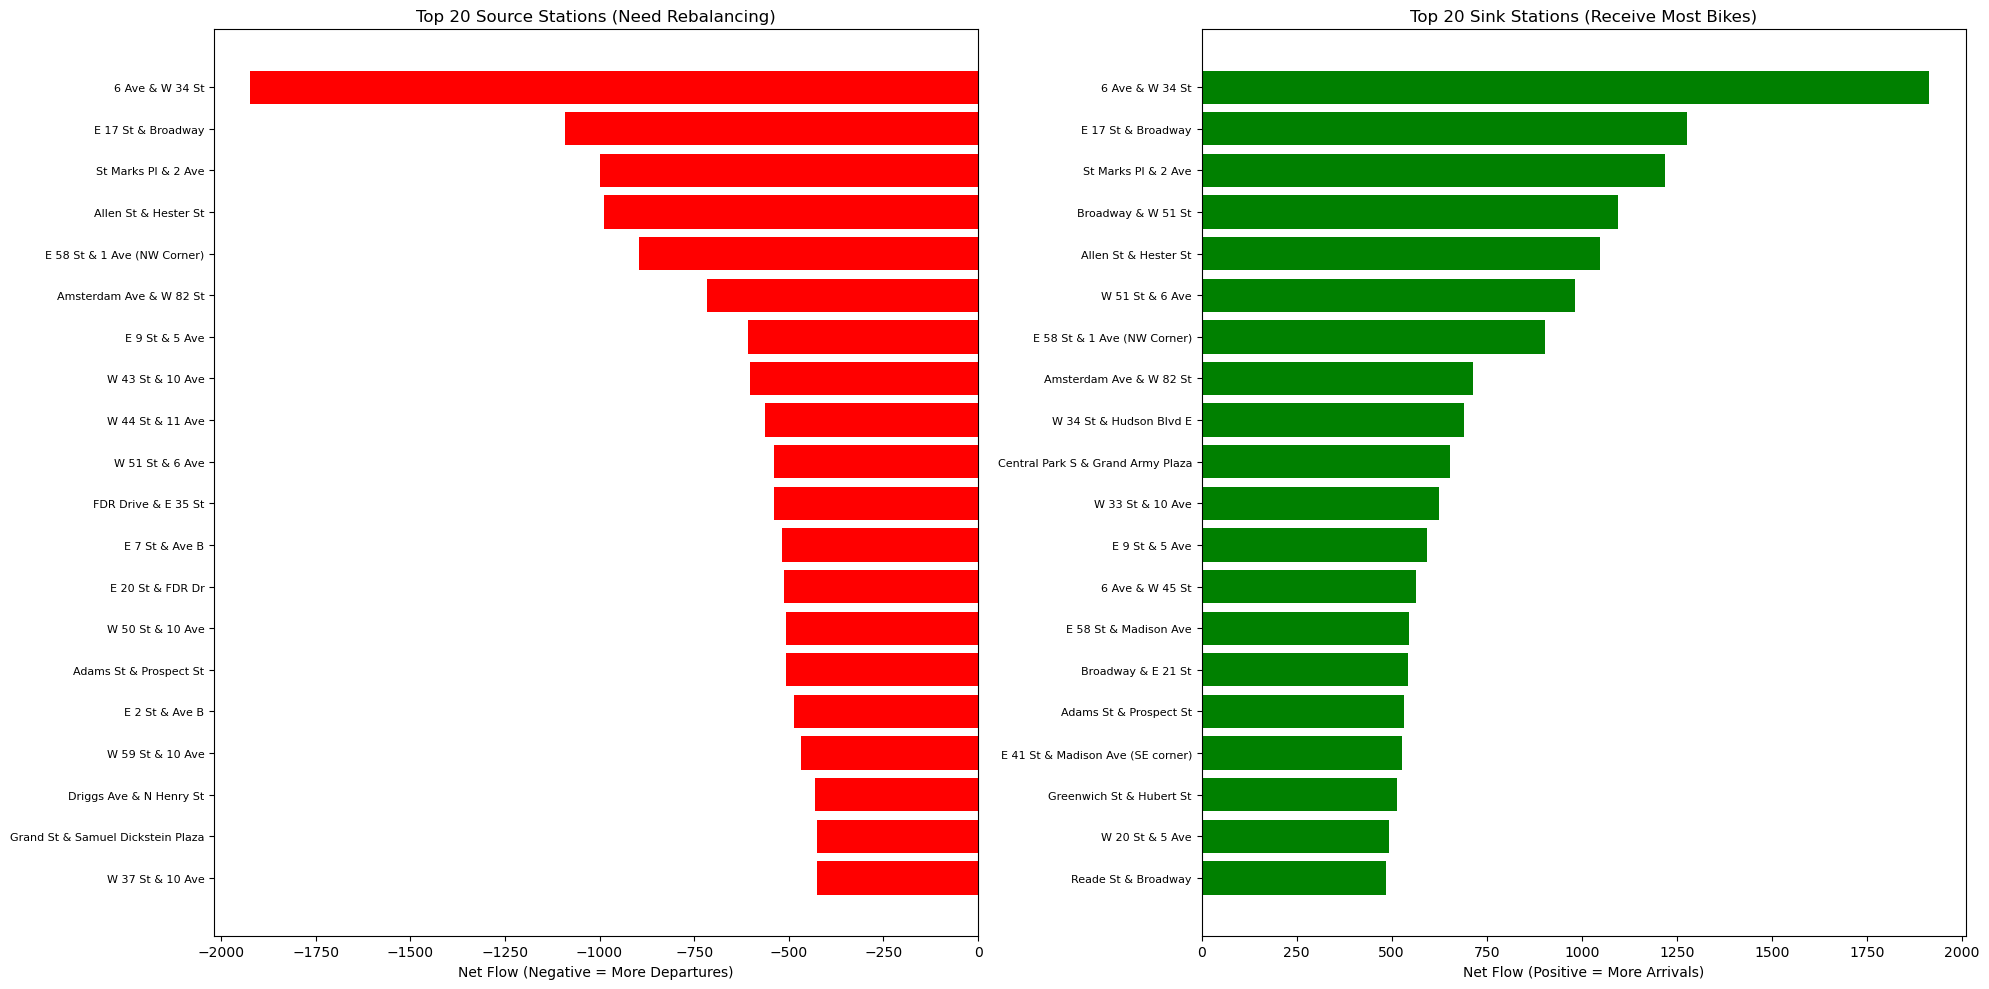

In [84]:
# Calculate total net flow per station
station_net_flow = bike_changes.groupby('station_id')['net_change'].sum().reset_index()
station_net_flow.columns = ['station_id', 'total_net_flow']

# Merge with station names from df_merged (not bike_changes!)
station_info = df_merged[['start_station_id', 'start_station_name']].drop_duplicates()
station_info.columns = ['station_id', 'station_name']
station_net_flow = station_net_flow.merge(station_info, on='station_id', how='left')

# Identify source stations (net negative) and sink stations (net positive)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Top 20 source stations (losing bikes)
sources = station_net_flow.nsmallest(20, 'total_net_flow')
ax1.barh(range(len(sources)), sources['total_net_flow'], color='red')
ax1.set_yticks(range(len(sources)))
ax1.set_yticklabels(sources['station_name'].values, fontsize=8)
ax1.set_xlabel('Net Flow (Negative = More Departures)')
ax1.set_title('Top 20 Source Stations (Need Rebalancing)')
ax1.invert_yaxis()

# Top 20 sink stations (gaining bikes)
sinks = station_net_flow.nlargest(20, 'total_net_flow')
ax2.barh(range(len(sinks)), sinks['total_net_flow'], color='green')
ax2.set_yticks(range(len(sinks)))
ax2.set_yticklabels(sinks['station_name'].values, fontsize=8)
ax2.set_xlabel('Net Flow (Positive = More Arrivals)')
ax2.set_title('Top 20 Sink Stations (Receive Most Bikes)')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

In [85]:
# Calculate total net flow per station
station_net_flow = bike_changes.groupby('station_id')['net_change'].sum().reset_index()
station_net_flow.columns = ['station_id', 'total_net_flow']

# Get top 20 outflow stations (most negative = losing bikes)
top_20_outflow = station_net_flow.nsmallest(20, 'total_net_flow')['station_id']

# Get top 20 inflow stations (most positive = gaining bikes)
top_20_inflow = station_net_flow.nlargest(20, 'total_net_flow')['station_id']

# Combine both
stations_to_plot = pd.concat([top_20_outflow, top_20_inflow])

# Get station locations
station_locations = df_merged[['start_station_id', 'start_lat', 'start_lng', 'start_station_name']].drop_duplicates()
station_locations.columns = ['station_id', 'lat', 'lng', 'station_name']

# Merge with net flow data
station_map_data = pd.merge(station_locations, station_net_flow, on='station_id')

# Filter for top 20 inflow and outflow only
station_map_data = station_map_data[station_map_data['station_id'].isin(stations_to_plot)]

# Add category label
station_map_data['flow_type'] = station_map_data['total_net_flow'].apply(
    lambda x: 'Outflow (Need Bikes)' if x < 0 else 'Inflow (Excess Bikes)'
)

# For size, use absolute value
station_map_data['abs_flow'] = station_map_data['total_net_flow'].abs()

# Create map with two colors
fig = px.scatter_mapbox(station_map_data,
                        lat='lat',
                        lon='lng',
                        size='abs_flow',
                        color='flow_type',
                        hover_name='station_name',
                        hover_data={
                            'station_id': True,
                            'total_net_flow': ':.0f',
                            'abs_flow': False,
                            'lat': False,
                            'lng': False,
                            'flow_type': False
                        },
                        color_discrete_map={
                            'Outflow (Need Bikes)': 'red',
                            'Inflow (Excess Bikes)': 'green'
                        },
                        size_max=25,
                        zoom=11,
                        title='Top 20 Inflow vs Top 20 Outflow Stations for 08/2024',
                        labels={'total_net_flow': 'Net Flow'})

fig.update_layout(mapbox_style='open-street-map')
fig.show()

#### Recreate Bike_Changes with Daily Reset

In [86]:
print("="*60)
print("RECREATING bike_changes WITH DAILY RESET")
print("="*60)

# Create departure and arrival events from df_merged
departures_df = df_merged[['start_station_id', 'started_at']].copy()
departures_df.columns = ['station_id', 'timestamp']
departures_df['event_type'] = -1  # Departure

arrivals_df = df_merged[['end_station_id', 'ended_at']].copy()
arrivals_df.columns = ['station_id', 'timestamp']
arrivals_df['event_type'] = 1  # Arrival

# Combine all events
all_events = pd.concat([departures_df, arrivals_df], ignore_index=True)

# Create 15-min intervals and date
all_events['time_interval'] = pd.to_datetime(all_events['timestamp']).dt.floor('15min')
all_events['date'] = pd.to_datetime(all_events['timestamp']).dt.date

print(f"\nTotal events: {len(all_events):,}")

# Group by station, date, and time interval
bike_changes = all_events.groupby(['station_id', 'date', 'time_interval'])['event_type'].sum().reset_index()
bike_changes.columns = ['station_id', 'date', 'time_interval', 'net_change']

# Sort by station, date, and time
bike_changes = bike_changes.sort_values(['station_id', 'date', 'time_interval'])

# Calculate cumulative WITHIN each day (resets daily!)
bike_changes['cumulative_bikes'] = bike_changes.groupby(['station_id', 'date'])['net_change'].cumsum()

print(f"\n✅ bike_changes recreated with daily reset!")
print(f"Shape: {bike_changes.shape}")
print(f"\nCumulative bikes now resets each day")
print(f"Range: {bike_changes['cumulative_bikes'].min()} to {bike_changes['cumulative_bikes'].max()}")

# Show sample
print("\nSample data (first station, first few days):")
sample_station = bike_changes['station_id'].iloc[0]
print(bike_changes[bike_changes['station_id'] == sample_station].head(20))


RECREATING bike_changes WITH DAILY RESET

Total events: 1,881,856

✅ bike_changes recreated with daily reset!
Shape: (413942, 5)

Cumulative bikes now resets each day
Range: -124 to 133

Sample data (first station, first few days):
   station_id        date       time_interval  net_change  cumulative_bikes
0  190 Morgan  2024-08-02 2024-08-02 09:30:00           1                 1
1  190 Morgan  2024-08-06 2024-08-06 08:00:00           1                 1
2  190 Morgan  2024-08-21 2024-08-21 08:30:00           1                 1
3  190 Morgan  2024-08-23 2024-08-23 09:15:00           1                 1


### Avg Inflows and Outflows per Station per 15-min Interval

## Implement a Baseline Linear Regression Model

In [69]:
# Add temporal features
bike_changes['time_interval'] = pd.to_datetime(bike_changes['time_interval'])
bike_changes['hour'] = bike_changes['time_interval'].dt.hour
bike_changes['day_of_week'] = bike_changes['time_interval'].dt.dayofweek
bike_changes['minute'] = bike_changes['time_interval'].dt.minute
bike_changes['is_morning_rush'] = bike_changes['hour'].isin([7, 8, 9]).astype(int)
bike_changes['is_evening_rush'] = bike_changes['hour'].isin([17, 18, 19]).astype(int)

print("✅ Temporal features added")

# Add lag features (within each station-date!)
bike_changes['cumulative_bikes_lag1'] = bike_changes.groupby(['station_id', 'date'])['cumulative_bikes'].shift(1)
bike_changes['cumulative_bikes_lag2'] = bike_changes.groupby(['station_id', 'date'])['cumulative_bikes'].shift(2)
bike_changes['cumulative_bikes_lag4'] = bike_changes.groupby(['station_id', 'date'])['cumulative_bikes'].shift(4)

bike_changes['rate_of_change'] = bike_changes.groupby(['station_id', 'date'])['cumulative_bikes'].diff()
bike_changes['rate_of_change_lag1'] = bike_changes.groupby(['station_id', 'date'])['rate_of_change'].shift(1)

print("✅ Lag features added (within each day)")

# Add rolling features (within each station-date!)
bike_changes['rolling_mean_4'] = bike_changes.groupby(['station_id', 'date'])['net_change'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)
bike_changes['rolling_std_4'] = bike_changes.groupby(['station_id', 'date'])['net_change'].transform(
    lambda x: x.rolling(window=4, min_periods=1).std()
)

print("✅ Rolling features added (within each day)")


✅ Temporal features added
✅ Lag features added (within each day)
✅ Rolling features added (within each day)


In [70]:
# Create interval features from df_merged
interval_features = df_merged.copy()
interval_features['start_time_interval'] = pd.to_datetime(interval_features['started_at']).dt.floor('15min')
interval_features['date'] = pd.to_datetime(interval_features['started_at']).dt.date

# Aggregate by station, date, and time interval
station_interval_agg = interval_features.groupby(['start_station_id', 'date', 'start_time_interval']).agg({
    'trip_duration': ['mean', 'median'],
    'rideable_type': lambda x: (x == 'electric_bike').sum(),
    'member_casual': lambda x: (x == 'member').sum()
}).reset_index()

station_interval_agg.columns = [
    'station_id', 'date', 'time_interval',
    'avg_trip_duration', 'median_trip_duration',
    'electric_bike_count', 'member_count'
]

# Merge with bike_changes
bike_changes = pd.merge(
    bike_changes,
    station_interval_agg,
    on=['station_id', 'date', 'time_interval'],
    how='left'
)

# Fill missing trip features with 0 (intervals with no rides starting)
trip_cols = ['avg_trip_duration', 'median_trip_duration', 'electric_bike_count', 'member_count']
for col in trip_cols:
    bike_changes[col] = bike_changes[col].fillna(0)

print("✅ Trip features added")


✅ Trip features added


In [71]:
# Create station features
station_features = df_merged.groupby('start_station_id').agg({
    'start_lat': 'first',
    'start_lng': 'first',
    'start_station_name': 'first',
    'start_borough': 'first',
    'ride_id': 'count',
    'trip_duration': ['mean', 'std'],
    'member_casual': lambda x: (x == 'member').sum() / len(x)
}).reset_index()

station_features.columns = [
    'station_id', 'lat', 'lng', 'station_name', 'borough',
    'total_historical_rides', 'avg_trip_duration_hist', 'std_trip_duration', 'member_proportion_hist'
]

# Encode borough
from sklearn.preprocessing import LabelEncoder
le_borough = LabelEncoder()
station_features['borough_encoded'] = le_borough.fit_transform(station_features['borough'])

# Calculate distance from Manhattan center
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

manhattan_center_lat = 40.7580
manhattan_center_lon = -73.9855

station_features['distance_from_center'] = haversine_distance(
    station_features['lat'],
    station_features['lng'],
    manhattan_center_lat,
    manhattan_center_lon
)

# Merge station features
bike_changes = pd.merge(
    bike_changes,
    station_features[['station_id', 'lat', 'lng', 'borough', 'borough_encoded',
                      'distance_from_center', 'total_historical_rides',
                      'avg_trip_duration_hist', 'std_trip_duration', 'member_proportion_hist']],
    on='station_id',
    how='left'
)

print("✅ Station characteristics added")


✅ Station characteristics added


In [72]:
print("\n" + "="*60)
print("FINAL bike_changes WITH DAILY RESET")
print("="*60)

print(f"\nShape: {bike_changes.shape}")
print(f"\nColumns: {bike_changes.columns.tolist()}")

print(f"\n✅ Cumulative bikes distribution (WITH DAILY RESET):")
print(bike_changes['cumulative_bikes'].describe())

print(f"\nMissing values:")
print(bike_changes.isna().sum()[bike_changes.isna().sum() > 0])

# Visualize the daily reset effect
sample_station = bike_changes.groupby('station_id')['cumulative_bikes'].apply(lambda x: abs(x).sum()).nlargest(1).index[0]
sample_data = bike_changes[bike_changes['station_id'] == sample_station].sort_values('time_interval')




FINAL bike_changes WITH DAILY RESET

Shape: (413942, 30)

Columns: ['station_id', 'date', 'time_interval', 'net_change', 'cumulative_bikes', 'hour', 'day_of_week', 'minute', 'is_morning_rush', 'is_evening_rush', 'cumulative_bikes_lag1', 'cumulative_bikes_lag2', 'cumulative_bikes_lag4', 'rate_of_change', 'rate_of_change_lag1', 'rolling_mean_4', 'rolling_std_4', 'avg_trip_duration', 'median_trip_duration', 'electric_bike_count', 'member_count', 'lat', 'lng', 'borough', 'borough_encoded', 'distance_from_center', 'total_historical_rides', 'avg_trip_duration_hist', 'std_trip_duration', 'member_proportion_hist']

✅ Cumulative bikes distribution (WITH DAILY RESET):
count    413942.000000
mean         -1.182190
std          11.952101
min        -124.000000
25%          -6.000000
50%          -1.000000
75%           2.000000
max         133.000000
Name: cumulative_bikes, dtype: float64

Missing values:
cumulative_bikes_lag1      30236
cumulative_bikes_lag2      59730
cumulative_bikes_lag4     

In [73]:
bike_changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413942 entries, 0 to 413941
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   station_id              413942 non-null  object        
 1   date                    413942 non-null  object        
 2   time_interval           413942 non-null  datetime64[ns]
 3   net_change              413942 non-null  int64         
 4   cumulative_bikes        413942 non-null  int64         
 5   hour                    413942 non-null  int64         
 6   day_of_week             413942 non-null  int64         
 7   minute                  413942 non-null  int64         
 8   is_morning_rush         413942 non-null  int64         
 9   is_evening_rush         413942 non-null  int64         
 10  cumulative_bikes_lag1   383706 non-null  float64       
 11  cumulative_bikes_lag2   354212 non-null  float64       
 12  cumulative_bikes_lag4   297685

### Feature Engineering

In [74]:
df_weather = pd.read_csv('data/2024_08/weather_data_2024.csv', low_memory=False)    

In [75]:
# Round weather data to 15-min intervals to match
df_weather['time_interval'] = pd.to_datetime(df_weather['datetime']).dt.floor('15min')

# Merge weather features
bike_changes = pd.merge(
    bike_changes, 
    df_weather[['time_interval', 'temp', 'dew', 'precip', 'precipprob', 'windspeed', 'cloudcover', 'visibility', 'conditions']], 
    on='time_interval', 
    how='left'
)

bike_changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413942 entries, 0 to 413941
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   station_id              413942 non-null  object        
 1   date                    413942 non-null  object        
 2   time_interval           413942 non-null  datetime64[ns]
 3   net_change              413942 non-null  int64         
 4   cumulative_bikes        413942 non-null  int64         
 5   hour                    413942 non-null  int64         
 6   day_of_week             413942 non-null  int64         
 7   minute                  413942 non-null  int64         
 8   is_morning_rush         413942 non-null  int64         
 9   is_evening_rush         413942 non-null  int64         
 10  cumulative_bikes_lag1   383706 non-null  float64       
 11  cumulative_bikes_lag2   354212 non-null  float64       
 12  cumulative_bikes_lag4   297685

In [76]:
# Remove Duplicate Columns After Merge

# Get all columns with _x or _y suffix
duplicate_cols = [col for col in bike_changes.columns if col.endswith('_x') or col.endswith('_y')]

print(f"Found {len(duplicate_cols)} duplicate columns: {duplicate_cols}")

# Drop all _y columns first
y_cols = [col for col in bike_changes.columns if col.endswith('_y')]
bike_changes = bike_changes.drop(columns=y_cols)

# Rename _x columns back to original names
x_cols = [col for col in bike_changes.columns if col.endswith('_x')]
rename_dict = {col: col.replace('_x', '') for col in x_cols}
bike_changes = bike_changes.rename(columns=rename_dict)

print(f"\nCleaned! Remaining columns: {len(bike_changes.columns)}")
print(bike_changes.columns.tolist())

Found 0 duplicate columns: []

Cleaned! Remaining columns: 38
['station_id', 'date', 'time_interval', 'net_change', 'cumulative_bikes', 'hour', 'day_of_week', 'minute', 'is_morning_rush', 'is_evening_rush', 'cumulative_bikes_lag1', 'cumulative_bikes_lag2', 'cumulative_bikes_lag4', 'rate_of_change', 'rate_of_change_lag1', 'rolling_mean_4', 'rolling_std_4', 'avg_trip_duration', 'median_trip_duration', 'electric_bike_count', 'member_count', 'lat', 'lng', 'borough', 'borough_encoded', 'distance_from_center', 'total_historical_rides', 'avg_trip_duration_hist', 'std_trip_duration', 'member_proportion_hist', 'temp', 'dew', 'precip', 'precipprob', 'windspeed', 'cloudcover', 'visibility', 'conditions']


In [77]:
# Create binary rain indicator
bike_changes['is_raining'] = bike_changes['conditions'].str.contains('Rain', na=False).astype(int)

# Verify the encoding
print("Rain encoding verification:")
print(bike_changes[['conditions', 'is_raining']].drop_duplicates().sort_values('is_raining'))

# Check distribution
print(f"\nDistribution:")
print(f"No rain (0): {(bike_changes['is_raining'] == 0).sum()} intervals")
print(f"Rain (1): {(bike_changes['is_raining'] == 1).sum()} intervals")
print(f"Percentage rainy: {bike_changes['is_raining'].mean() * 100:.1f}%")


Rain encoding verification:
                  conditions  is_raining
0                        NaN           0
1                   Overcast           0
4                      Clear           0
24          Partially cloudy           0
108           Rain, Overcast           1
322   Rain, Partially cloudy           1
1159                    Rain           1

Distribution:
No rain (0): 405900 intervals
Rain (1): 8042 intervals
Percentage rainy: 1.9%


In [78]:
# Add 3 more columns back to bike_features and encode catergorical variables

# Create aggregated features from df_merged
interval_features = df_merged.copy()
interval_features['start_time_interval'] = pd.to_datetime(interval_features['started_at']).dt.floor('15min')

# Encode categorical variables
rideable_dummies = pd.get_dummies(interval_features['rideable_type'], prefix='bike_type')
member_dummies = pd.get_dummies(interval_features['member_casual'], prefix='user_type')

# Add to interval features and re-aggregate
interval_features_cat = pd.concat([interval_features, rideable_dummies, member_dummies], axis=1)

station_interval_agg_cat = interval_features_cat.groupby(['start_station_id', 'start_time_interval']).agg({
    'trip_duration': ['mean', 'median'],
    'bike_type_electric_bike': 'sum',
    'bike_type_classic_bike': 'sum',
    'user_type_member': 'sum',
    'user_type_casual': 'sum'
}).reset_index()

station_interval_agg_cat.columns = [
    'station_id', 'time_interval',
    'avg_trip_duration', 'median_trip_duration',
    'electric_bike_count', 'classic_bike_count',
    'member_count', 'casual_count'
]
station_interval_agg_cat.head()

# Merge
bike_changes = pd.merge(bike_changes, station_interval_agg_cat, on=['station_id', 'time_interval'], how='left')

#### Clean new DF

In [87]:
# 1. Drop redundant columns
bike_changes = bike_changes.drop(columns=['conditions'])

# 2. Fill missing weather data (forward fill from previous hour)
weather_cols = ['temp', 'dew', 'precip', 'precipprob', 'windspeed', 'cloudcover', 'visibility']

# Sort by station and time to ensure proper filling
bike_changes = bike_changes.sort_values(['station_id', 'time_interval'])

# Forward fill weather within each day (weather shouldn't change drastically in 15 min)
for col in weather_cols:
    bike_changes[col] = bike_changes.groupby('station_id')[col].ffill()
    # Also backward fill for any remaining NaNs at the start
    bike_changes[col] = bike_changes.groupby('station_id')[col].bfill()

# 3. Fill missing trip data with 0 (intervals with no rides)
trip_cols = ['avg_trip_duration', 'median_trip_duration', 'electric_bike_count', 
             'classic_bike_count', 'member_count', 'casual_count']

for col in trip_cols:
    bike_changes[col] = bike_changes[col].fillna(0)



KeyError: "['conditions'] not found in axis"

In [ ]:
print("Missing values after cleaning:")
print(bike_changes.isna().sum())

print(f"\nDataframe shape: {bike_changes.shape}")

Missing values after cleaning:
station_id                     0
date                           0
time_interval                  0
net_change                     0
cumulative_bikes               0
hour                           0
day_of_week                    0
minute                         0
is_morning_rush                0
is_evening_rush                0
cumulative_bikes_lag1      30236
cumulative_bikes_lag2      59730
cumulative_bikes_lag4     116257
rate_of_change             30236
rate_of_change_lag1        59730
rolling_mean_4                 0
rolling_std_4              30236
avg_trip_duration_x            0
median_trip_duration_x         0
electric_bike_count_x          0
member_count_x                 0
lat                          253
lng                          253
borough                      253
borough_encoded              253
distance_from_center         253
total_historical_rides       253
avg_trip_duration_hist       253
std_trip_duration            417
member_propo

#### Drop unused columns

In [ ]:
# Columns to drop for modeling
cols_to_drop_modeling = [
    'minute',  # Low variance, redundant with 15-min intervals
    'net_change',  # Data leakage (directly calculates cumulative_bikes)
    'classic_bike_count',  # Redundant with electric_bike_count
    'casual_count',  # Redundant with member_count
    'cloudcover',
    'visibility',
    'precipprob',
    'precip',
    'dew'
]

# Create modeling dataset
bike_changes = bike_changes.drop(columns=cols_to_drop_modeling)

print(f"Columns after dropping: {bike_changes.shape[1]}")
print(f"\nFeatures for modeling:")
print(bike_changes.columns.tolist())

Columns after dropping: 35

Features for modeling:
['station_id', 'date', 'time_interval', 'cumulative_bikes', 'hour', 'day_of_week', 'is_morning_rush', 'is_evening_rush', 'cumulative_bikes_lag1', 'cumulative_bikes_lag2', 'cumulative_bikes_lag4', 'rate_of_change', 'rate_of_change_lag1', 'rolling_mean_4', 'rolling_std_4', 'avg_trip_duration_x', 'median_trip_duration_x', 'electric_bike_count_x', 'member_count_x', 'lat', 'lng', 'borough', 'borough_encoded', 'distance_from_center', 'total_historical_rides', 'avg_trip_duration_hist', 'std_trip_duration', 'member_proportion_hist', 'temp', 'windspeed', 'is_raining', 'avg_trip_duration_y', 'median_trip_duration_y', 'electric_bike_count_y', 'member_count_y']


In [ ]:
# Final check for missing values
missing_summary = pd.DataFrame({
    'Column': bike_changes.columns,
    'Missing_Count': bike_changes.isna().sum().values,
    'Missing_Percentage': (bike_changes.isna().sum().values / len(bike_changes) * 100).round(2)
})

# Sort by missing count descending
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)

# Display all columns
print(missing_summary.to_string(index=False))

                Column  Missing_Count  Missing_Percentage
 cumulative_bikes_lag4         116257               28.09
 electric_bike_count_y         102145               24.68
median_trip_duration_y         102145               24.68
        member_count_y         102145               24.68
   avg_trip_duration_y         102145               24.68
   rate_of_change_lag1          59730               14.43
 cumulative_bikes_lag2          59730               14.43
        rate_of_change          30236                7.30
         rolling_std_4          30236                7.30
 cumulative_bikes_lag1          30236                7.30
     std_trip_duration            417                0.10
member_proportion_hist            253                0.06
       borough_encoded            253                0.06
  distance_from_center            253                0.06
                   lat            253                0.06
                   lng            253                0.06
              

In [ ]:
print("="*60)
print("CLEANING bike_changes")
print("="*60)

# Drop duplicate columns (_y versions)
y_cols = [col for col in bike_changes.columns if col.endswith('_y')]
print(f"\nDropping {len(y_cols)} duplicate '_y' columns:")
print(y_cols)

bike_changes = bike_changes.drop(columns=y_cols)

# Rename _x columns back to original names
x_cols = [col for col in bike_changes.columns if col.endswith('_x')]
rename_dict = {col: col.replace('_x', '') for col in x_cols}
bike_changes = bike_changes.rename(columns=rename_dict)

print(f"\n✅ Renamed {len(rename_dict)} '_x' columns back to original names")

# Check remaining missing values
print("\n" + "="*60)
print("REMAINING MISSING VALUES")
print("="*60)

missing_after = bike_changes.isna().sum()
missing_after = missing_after[missing_after > 0].sort_values(ascending=False)

if len(missing_after) > 0:
    missing_df = pd.DataFrame({
        'Column': missing_after.index,
        'Missing_Count': missing_after.values,
        'Missing_Percentage': (missing_after.values / len(bike_changes) * 100).round(2)
    })
    print(missing_df.to_string(index=False))
else:
    print("✅ No missing values!")

CLEANING bike_changes

Dropping 4 duplicate '_y' columns:
['avg_trip_duration_y', 'median_trip_duration_y', 'electric_bike_count_y', 'member_count_y']



✅ Renamed 4 '_x' columns back to original names

REMAINING MISSING VALUES
                Column  Missing_Count  Missing_Percentage
 cumulative_bikes_lag4         116257               28.09
   rate_of_change_lag1          59730               14.43
 cumulative_bikes_lag2          59730               14.43
 cumulative_bikes_lag1          30236                7.30
        rate_of_change          30236                7.30
         rolling_std_4          30236                7.30
     std_trip_duration            417                0.10
                   lng            253                0.06
                   lat            253                0.06
               borough            253                0.06
       borough_encoded            253                0.06
total_historical_rides            253                0.06
  distance_from_center            253                0.06
avg_trip_duration_hist            253                0.06
member_proportion_hist            253                0.

In [ ]:
print("\n" + "="*60)
print("HANDLING MISSING VALUES")
print("="*60)

original_shape = bike_changes.shape

# Strategy:
# 1. Lag features (7-28% missing) - Expected, drop rows
# 2. Station features (0.06% missing) - Unknown stations, drop rows  
# 3. Weather features (0.01% missing) - Fill with forward/backward fill
# 4. std_trip_duration (0.10%) - Fill with 0

# Fill weather (tiny amount missing)
weather_cols = ['temp', 'dew', 'precip', 'precipprob', 'windspeed', 'cloudcover', 'visibility']
for col in weather_cols:
    if col in bike_changes.columns and bike_changes[col].isna().any():
        # Forward fill then backward fill
        bike_changes[col] = bike_changes.groupby('station_id')[col].ffill()
        bike_changes[col] = bike_changes.groupby('station_id')[col].bfill()
        # Fill any remaining with median
        bike_changes[col] = bike_changes[col].fillna(bike_changes[col].median())

print("✅ Weather columns filled")

# Fill std_trip_duration with 0 (means no variation)
if 'std_trip_duration' in bike_changes.columns:
    bike_changes['std_trip_duration'] = bike_changes['std_trip_duration'].fillna(0)
    print("✅ std_trip_duration filled with 0")

# Drop rows with missing lag features or station features
# These cannot be meaningfully imputed
bike_changes_clean = bike_changes.dropna()

print(f"\n✅ Dropped rows with missing lag/station features")
print(f"   Original: {original_shape[0]:,} rows")
print(f"   Clean: {len(bike_changes_clean):,} rows")
print(f"   Dropped: {original_shape[0] - len(bike_changes_clean):,} rows ({(original_shape[0] - len(bike_changes_clean))/original_shape[0]*100:.1f}%)")

# Verify no missing values
print(f"\n✅ Remaining missing values: {bike_changes_clean.isna().sum().sum()}")

# Update bike_changes
bike_changes = bike_changes_clean

print("\n" + "="*60)
print("FINAL CLEANED bike_changes")
print("="*60)
print(f"Shape: {bike_changes.shape}")
print(f"Columns: {len(bike_changes.columns)}")
print(f"Missing values: {bike_changes.isna().sum().sum()}")


HANDLING MISSING VALUES
✅ Weather columns filled
✅ std_trip_duration filled with 0

✅ Dropped rows with missing lag/station features
   Original: 413,942 rows
   Clean: 297,597 rows
   Dropped: 116,345 rows (28.1%)

✅ Remaining missing values: 0

FINAL CLEANED bike_changes
Shape: (297597, 31)
Columns: 31
Missing values: 0


Morning rush data: 212,326 rows
Evening rush data: 201,556 rows


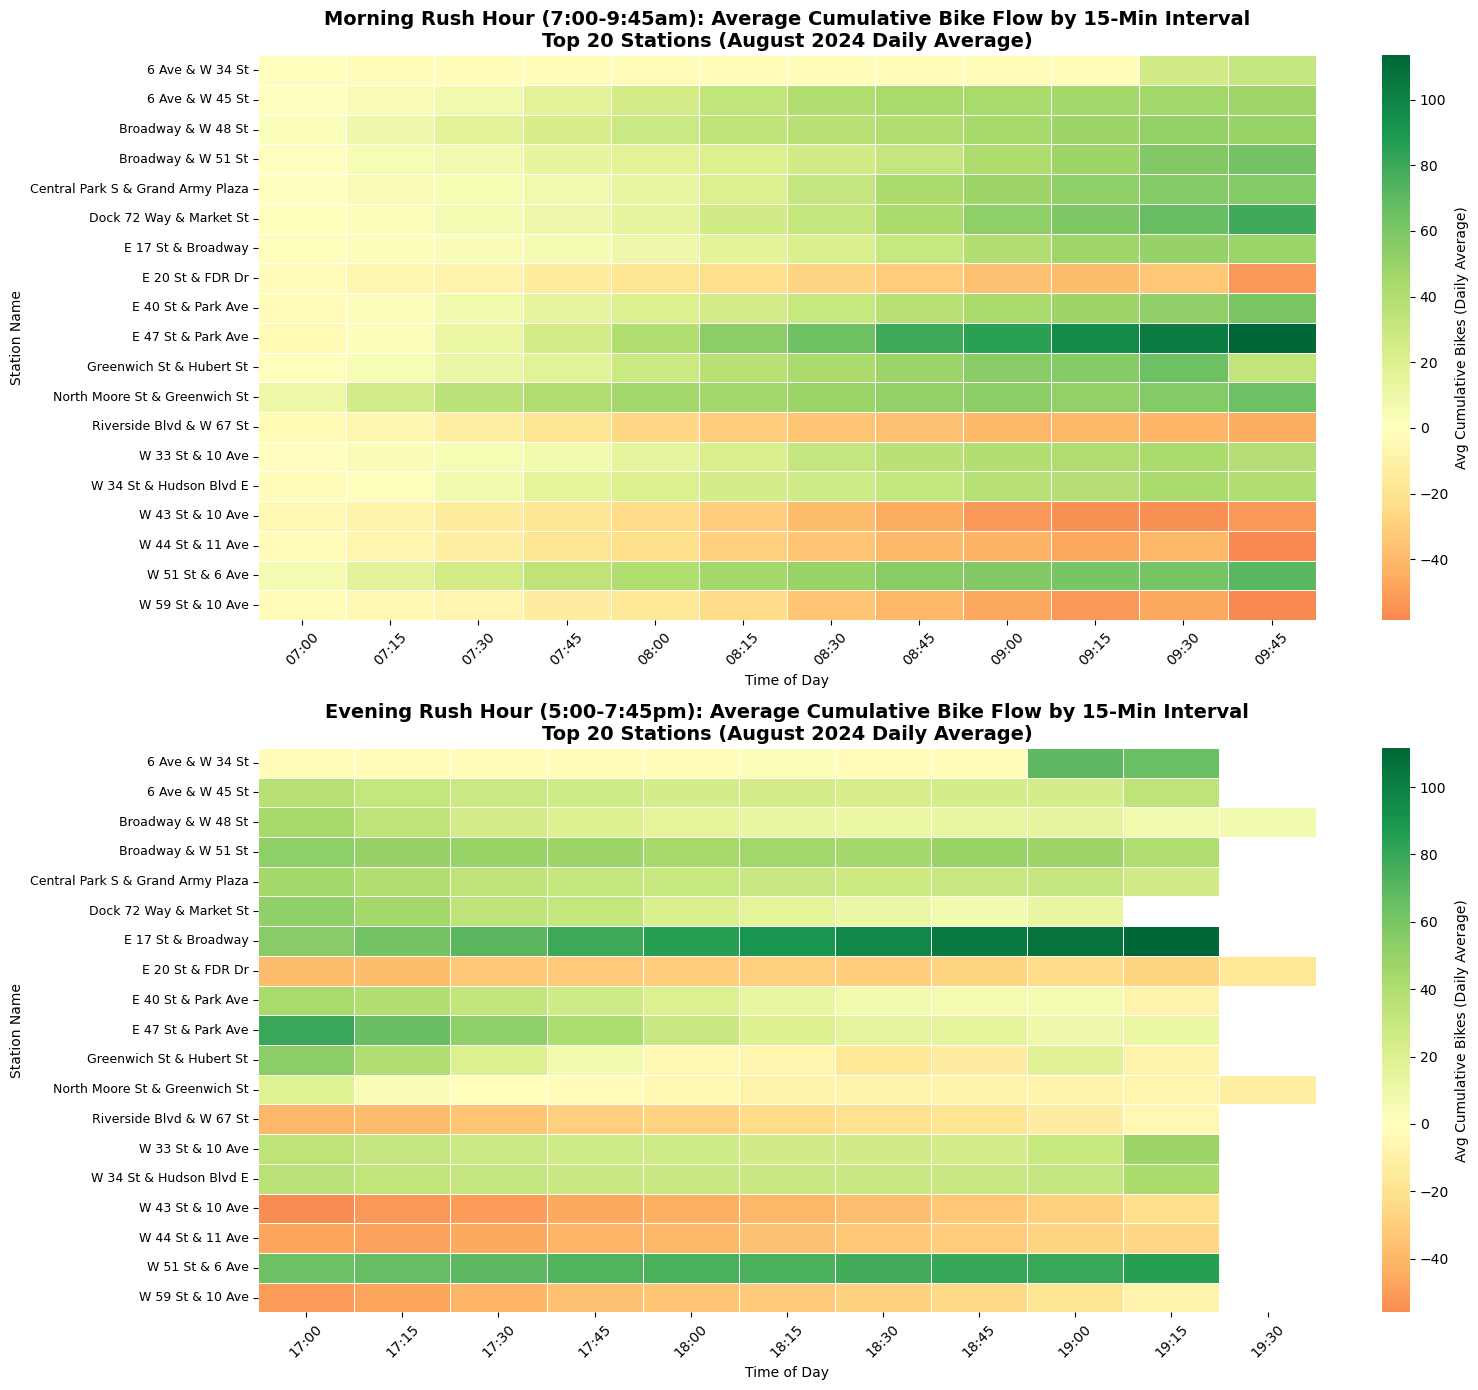


✅ Heatmaps generated successfully!

📊 Showing AVERAGE cumulative bikes across all weekdays in August
   Morning rush: 212,326 data points averaged
   Evening rush: 201,556 data points averaged


In [99]:
# Create station ID to name mapping
station_id_to_name = df_merged[['start_station_id', 'start_station_name']].drop_duplicates()
station_id_to_name.columns = ['station_id', 'station_name']
station_id_to_name = station_id_to_name.dropna().set_index('station_id')['station_name'].to_dict()

# Check if rush hour columns exist, if not recreate them
if 'hour' not in bike_changes.columns:
    bike_changes['hour'] = pd.to_datetime(bike_changes['time_interval']).dt.hour
    print("✅ Recreated 'hour' column from time_interval")

if 'is_morning_rush' not in bike_changes.columns:
    bike_changes['is_morning_rush'] = bike_changes['hour'].isin([7, 8, 9]).astype(int)
    print("✅ Recreated 'is_morning_rush' column")
    
if 'is_evening_rush' not in bike_changes.columns:
    bike_changes['is_evening_rush'] = bike_changes['hour'].isin([17, 18, 19]).astype(int)
    print("✅ Recreated 'is_evening_rush' column")

# Separate morning and evening rush data using rush hour flags
# Use .copy() to avoid SettingWithCopyWarning
morning_rush = bike_changes[bike_changes['is_morning_rush'] == 1].copy()
evening_rush = bike_changes[bike_changes['is_evening_rush'] == 1].copy()

print(f"Morning rush data: {len(morning_rush):,} rows")
print(f"Evening rush data: {len(evening_rush):,} rows")

# Get top 20 stations based on total absolute cumulative bikes across the month
top_20_stations = bike_changes.groupby('station_id')['cumulative_bikes'].apply(
    lambda x: abs(x).sum()
).nlargest(20).index

# Filter for top 20 - use .loc to avoid warnings
morning_top20 = morning_rush.loc[morning_rush['station_id'].isin(top_20_stations)].copy()
evening_top20 = evening_rush.loc[evening_rush['station_id'].isin(top_20_stations)].copy()

# Create time_only column (just HH:MM, no date) - now safe to modify
morning_top20['time_only'] = pd.to_datetime(morning_top20['time_interval']).dt.strftime('%H:%M')
evening_top20['time_only'] = pd.to_datetime(evening_top20['time_interval']).dt.strftime('%H:%M')

# Add station names
morning_top20['station_name'] = morning_top20['station_id'].map(station_id_to_name)
evening_top20['station_name'] = evening_top20['station_id'].map(station_id_to_name)

# Create pivots for heatmap - use MEAN aggregation to show average across all days in August
morning_pivot = morning_top20.pivot_table(
    index='station_name',
    columns='time_only',
    values='cumulative_bikes',
    aggfunc='mean'  # Average across all days
)

evening_pivot = evening_top20.pivot_table(
    index='station_name',
    columns='time_only',
    values='cumulative_bikes',
    aggfunc='mean'  # Average across all days
)

# Plot morning heatmap
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))

sns.heatmap(morning_pivot, cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Avg Cumulative Bikes (Daily Average)'},
            linewidths=0.5, ax=ax1, fmt='.1f')
ax1.set_title('Morning Rush Hour (7:00-9:45am): Average Cumulative Bike Flow by 15-Min Interval\nTop 20 Stations (August 2024 Daily Average)',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Station Name')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0, labelsize=9)

# Plot evening heatmap
sns.heatmap(evening_pivot, cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Avg Cumulative Bikes (Daily Average)'},
            linewidths=0.5, ax=ax2, fmt='.1f')
ax2.set_title('Evening Rush Hour (5:00-7:45pm): Average Cumulative Bike Flow by 15-Min Interval\nTop 20 Stations (August 2024 Daily Average)',
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Time of Day')
ax2.set_ylabel('Station Name')
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='y', rotation=0, labelsize=9)

plt.tight_layout()
plt.show()

print(f"\n✅ Heatmaps generated successfully!")
print(f"\n📊 Showing AVERAGE cumulative bikes across all weekdays in August")
print(f"   Morning rush: {len(morning_rush):,} data points averaged")
print(f"   Evening rush: {len(evening_rush):,} data points averaged")

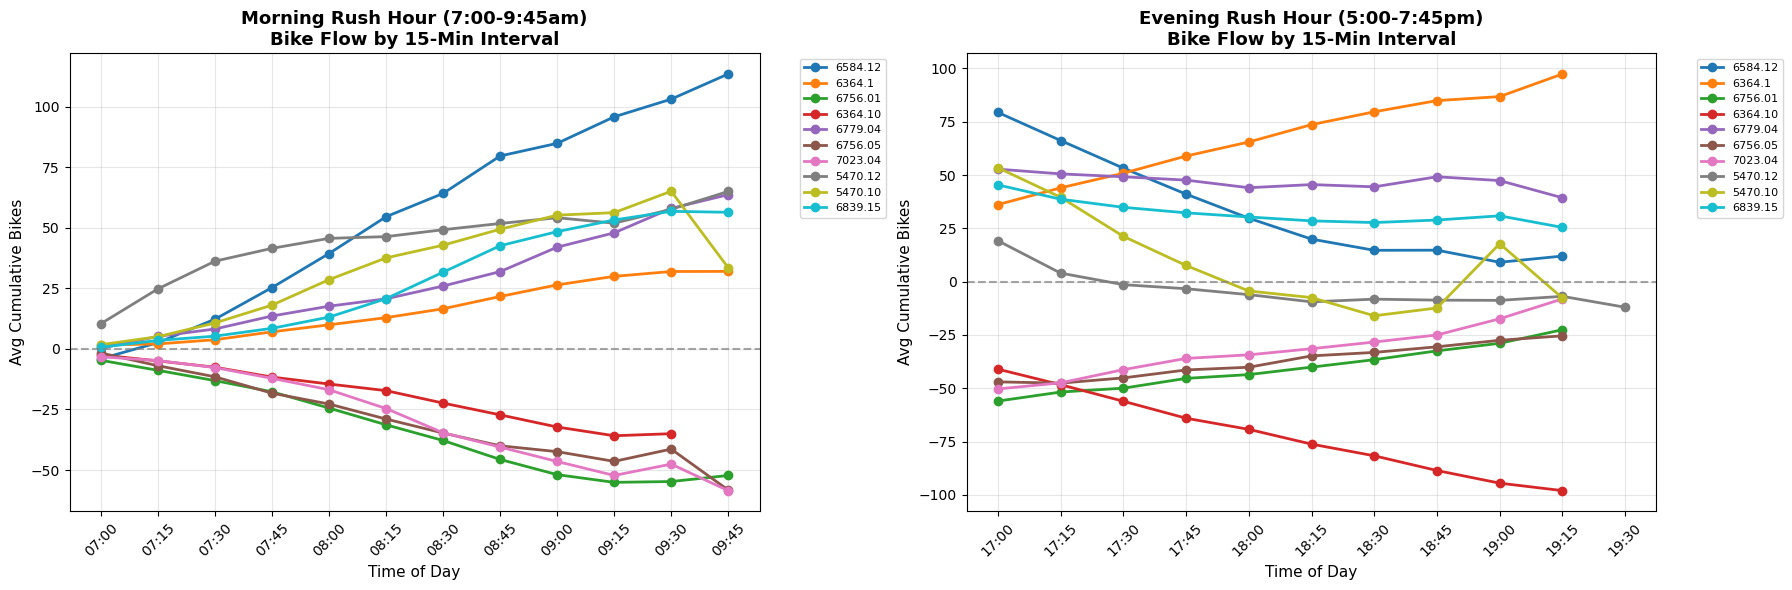

In [100]:
# Separate morning and evening rush data
morning_rush = bike_changes[bike_changes['is_morning_rush'] == 1].copy()
evening_rush = bike_changes[bike_changes['is_evening_rush'] == 1].copy()

# Get top 10 stations
top_10_stations = bike_changes.groupby('station_id')['cumulative_bikes'].apply(
    lambda x: abs(x).sum()
).nlargest(10).index

# Create time_only column
morning_rush['time_only'] = pd.to_datetime(morning_rush['time_interval']).dt.strftime('%H:%M')
evening_rush['time_only'] = pd.to_datetime(evening_rush['time_interval']).dt.strftime('%H:%M')

# Filter for top 10
morning_top10 = morning_rush[morning_rush['station_id'].isin(top_10_stations)]
evening_top10 = evening_rush[evening_rush['station_id'].isin(top_10_stations)]

# Average per station per time slot
morning_avg = morning_top10.groupby(['station_id', 'time_only'])['cumulative_bikes'].mean().reset_index()
evening_avg = evening_top10.groupby(['station_id', 'time_only'])['cumulative_bikes'].mean().reset_index()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Morning plot
for station in top_10_stations:
    station_data = morning_avg[morning_avg['station_id'] == station].sort_values('time_only')
    ax1.plot(station_data['time_only'], station_data['cumulative_bikes'], 
             marker='o', label=station, linewidth=2)

ax1.axhline(y=0, linestyle='--', color='gray', alpha=0.7, linewidth=1.5)
ax1.set_xlabel('Time of Day', fontsize=11)
ax1.set_ylabel('Avg Cumulative Bikes', fontsize=11)
ax1.set_title('Morning Rush Hour (7:00-9:45am)\nBike Flow by 15-Min Interval', 
              fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# Evening plot
for station in top_10_stations:
    station_data = evening_avg[evening_avg['station_id'] == station].sort_values('time_only')
    ax2.plot(station_data['time_only'], station_data['cumulative_bikes'], 
             marker='o', label=station, linewidth=2)

ax2.axhline(y=0, linestyle='--', color='gray', alpha=0.7, linewidth=1.5)
ax2.set_xlabel('Time of Day', fontsize=11)
ax2.set_ylabel('Avg Cumulative Bikes', fontsize=11)
ax2.set_title('Evening Rush Hour (5:00-7:45pm)\nBike Flow by 15-Min Interval', 
              fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [90]:
print("\n" + "="*60)
print("FINAL COLUMN LIST")
print("="*60)

print("\nAll columns in bike_changes:")
for i, col in enumerate(bike_changes.columns, 1):
    print(f"{i:2}. {col}")

# Check for any remaining _x or _y columns
x_or_y = [col for col in bike_changes.columns if col.endswith('_x') or col.endswith('_y')]
if x_or_y:
    print(f"\n⚠️  Still have _x or _y columns: {x_or_y}")
else:
    print(f"\n✅ No more _x or _y suffix columns")


FINAL COLUMN LIST

All columns in bike_changes:
 1. station_id
 2. date
 3. time_interval
 4. net_change
 5. cumulative_bikes

✅ No more _x or _y suffix columns


In [91]:
print("="*60)
print("CHECKING RUSH HOUR FILTERING")
print("="*60)

# Check what hours are actually in the data
print("\n1. HOURS PRESENT IN bike_changes:")
hours_in_data = sorted(bike_changes['hour'].unique())
print(f"   Hours: {hours_in_data}")

# Count rows per hour
hour_counts = bike_changes['hour'].value_counts().sort_index()
print("\n   Rows per hour:")
print(hour_counts)

# Check is_morning_rush and is_evening_rush
if 'is_morning_rush' in bike_changes.columns:
    morning_rush_hours = sorted(bike_changes[bike_changes['is_morning_rush'] == 1]['hour'].unique())
    print(f"\n2. MORNING RUSH HOURS (is_morning_rush == 1): {morning_rush_hours}")

if 'is_evening_rush' in bike_changes.columns:
    evening_rush_hours = sorted(bike_changes[bike_changes['is_evening_rush'] == 1]['hour'].unique())
    print(f"   EVENING RUSH HOURS (is_evening_rush == 1): {evening_rush_hours}")

# Check if there are non-rush hour rows
total_rows = len(bike_changes)
morning_rush_rows = (bike_changes['is_morning_rush'] == 1).sum() if 'is_morning_rush' in bike_changes.columns else 0
evening_rush_rows = (bike_changes['is_evening_rush'] == 1).sum() if 'is_evening_rush' in bike_changes.columns else 0

print("\n3. ROW DISTRIBUTION:")
print(f"   Total rows: {total_rows:,}")
print(f"   Morning rush rows: {morning_rush_rows:,}")
print(f"   Evening rush rows: {evening_rush_rows:,}")
print(f"   Non-rush rows: {total_rows - morning_rush_rows - evening_rush_rows:,}")

print("\n" + "="*60)
print("SEARCHING FOR WHERE FILTERING HAPPENED")
print("="*60)

print("""
Rush hour filtering could have happened in several places:

1. When creating df_train_cleaned (early in notebook)
2. When creating all_events (departures/arrivals) 
3. When creating bike_changes
4. When adding is_morning_rush/is_evening_rush columns

Let me check the original df_merged to trace back:
""")

CHECKING RUSH HOUR FILTERING

1. HOURS PRESENT IN bike_changes:


KeyError: 'hour'

### Features and Target

In [ ]:
# Step 1: Define target and features
TARGET = 'cumulative_bikes' # Resets daily

# Columns to exclude from features
EXCLUDE_COLUMNS = [
    TARGET,  # Target variable
    'station_id',  # Identifier (can't use in model directly)
    'time_interval',  # Datetime (use extracted features instead)
    'date',  # Datetime (redundant with time_interval)
    'net_change',  # Leakage (directly related to cumulative_bikes)
]

# Make a copy of dataset for modeling
bike_changes_model = bike_changes.copy()
bike_changes_model = bike_changes_model.dropna()

print(f"Original shape: {bike_changes_model.shape}")
print(f"Rows after dropna: {len(bike_changes_model):,}")

# Separate features and target
# Keep only numeric/useful features, exclude identifiers
X = bike_changes_model.drop(columns=[col for col in EXCLUDE_COLUMNS if col in bike_changes_model.columns])
y = bike_changes_model[TARGET]

print(f"\n✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")
print(f"✅ Target range: {y.min():.1f} to {y.max():.1f}")

print(f"\nFeatures being used ({X.shape[1]} total):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2}. {col}")


Original shape: (297597, 31)
Rows after dropna: 297,597

✅ X shape: (297597, 27)
✅ y shape: (297597,)
✅ Target range: -124.0 to 133.0

Features being used (27 total):
   1. hour
   2. day_of_week
   3. is_morning_rush
   4. is_evening_rush
   5. cumulative_bikes_lag1
   6. cumulative_bikes_lag2
   7. cumulative_bikes_lag4
   8. rate_of_change
   9. rate_of_change_lag1
  10. rolling_mean_4
  11. rolling_std_4
  12. avg_trip_duration
  13. median_trip_duration
  14. electric_bike_count
  15. member_count
  16. lat
  17. lng
  18. borough
  19. borough_encoded
  20. distance_from_center
  21. total_historical_rides
  22. avg_trip_duration_hist
  23. std_trip_duration
  24. member_proportion_hist
  25. temp
  26. windspeed
  27. is_raining


### Train/Validate/Test Split (Time-Based)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\n" + "="*60)
print("TIME-SERIES TRAIN/VAL/TEST SPLIT")
print("="*60)

# IMPORTANT: Sort by time first!
bike_changes_model = bike_changes_model.sort_values('time_interval')

# Reset index to ensure proper slicing
bike_changes_model = bike_changes_model.reset_index(drop=True)

# Define split ratios
train_pct = 0.6
val_pct = 0.2
test_pct = 0.2

n = len(bike_changes_model)
train_end = int(n * train_pct)
val_end = int(n * (train_pct + val_pct))

print(f"Total samples: {n:,}")
print(f"Split: {train_pct*100:.0f}% train, {val_pct*100:.0f}% val, {test_pct*100:.0f}% test")

# Sequential split (preserves temporal order)
train_idx = range(0, train_end)
val_idx = range(train_end, val_end)
test_idx = range(val_end, n)

# Split the data
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

X_val = X.iloc[val_idx]
y_val = y.iloc[val_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

print(f"\n✅ Train set: {len(X_train):,} samples ({len(X_train)/n*100:.1f}%)")
print(f"✅ Val set:   {len(X_val):,} samples ({len(X_val)/n*100:.1f}%)")
print(f"✅ Test set:  {len(X_test):,} samples ({len(X_test)/n*100:.1f}%)")

# Show time periods
train_times = bike_changes_model.iloc[train_idx]['time_interval']
val_times = bike_changes_model.iloc[val_idx]['time_interval']
test_times = bike_changes_model.iloc[test_idx]['time_interval']

print(f"\nTime periods:")
print(f"  Train: {train_times.min()} to {train_times.max()}")
print(f"  Val:   {val_times.min()} to {val_times.max()}")
print(f"  Test:  {test_times.min()} to {test_times.max()}")

print("\n⚠️  IMPORTANT: Data is split sequentially (not shuffled)")
print("   This respects the temporal ordering for time-series data")


TIME-SERIES TRAIN/VAL/TEST SPLIT
Total samples: 297,597
Split: 60% train, 20% val, 20% test

✅ Train set: 178,558 samples (60.0%)
✅ Val set:   59,519 samples (20.0%)
✅ Test set:  59,520 samples (20.0%)

Time periods:
  Train: 2024-08-01 08:00:00 to 2024-08-20 17:15:00
  Val:   2024-08-20 17:15:00 to 2024-08-26 18:00:00
  Test:  2024-08-26 18:00:00 to 2024-08-30 19:30:00

⚠️  IMPORTANT: Data is split sequentially (not shuffled)
   This respects the temporal ordering for time-series data


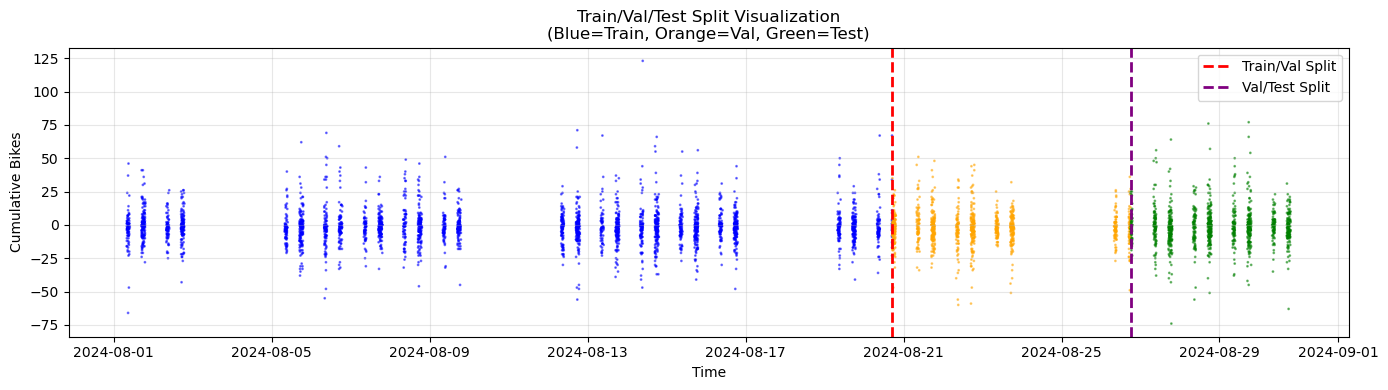

✅ Split complete and ready for modeling!


In [ ]:
# Visualize the split
fig, ax = plt.subplots(figsize=(14, 4))

# Plot a sample of the target variable colored by split
sample_size = min(5000, len(bike_changes_model))
sample_idx = np.random.choice(len(bike_changes_model), sample_size, replace=False)
sample_idx = sorted(sample_idx)

sample_data = bike_changes_model.iloc[sample_idx]

# Color by split
colors = []
for idx in sample_idx:
    if idx < train_end:
        colors.append('blue')
    elif idx < val_end:
        colors.append('orange')
    else:
        colors.append('green')

ax.scatter(sample_data['time_interval'], sample_data[TARGET], 
           c=colors, s=1, alpha=0.5)

# Add split boundaries
if 'time_interval' in bike_changes_model.columns:
    train_boundary = bike_changes_model.iloc[train_end]['time_interval']
    val_boundary = bike_changes_model.iloc[val_end-1]['time_interval']
    
    ax.axvline(train_boundary, color='red', linestyle='--', linewidth=2, label='Train/Val Split')
    ax.axvline(val_boundary, color='purple', linestyle='--', linewidth=2, label='Val/Test Split')

ax.set_xlabel('Time')
ax.set_ylabel('Cumulative Bikes')
ax.set_title('Train/Val/Test Split Visualization\n(Blue=Train, Orange=Val, Green=Test)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Split complete and ready for modeling!")

### Feature Scaling

In [ ]:
# Binary encode borough: Manhattan = 1, all others (Brooklyn) = 0
bike_changes_model['borough_manhattan'] = (bike_changes_model['borough'] == 'Manhattan').astype(int)

# Now drop the original borough column before creating X
X = bike_changes_model.drop(columns=[TARGET, 'borough'])
y = bike_changes_model[TARGET]

In [ ]:
# Check which columns are non-numeric
print("Non-numeric columns:")
print(X.select_dtypes(exclude=['number']).columns.tolist())

# Keep only numeric columns
X_numeric = X.select_dtypes(include=['number'])

print(f"\nOriginal X shape: {X.shape}")
print(f"Numeric X shape: {X_numeric.shape}")
print(f"Dropped {X.shape[1] - X_numeric.shape[1]} non-numeric columns")

# Now use X_numeric instead of X
X = X_numeric

# Re-split the data with numeric columns only
X_train = X.iloc[:train_end]
y_train = y.iloc[:train_end]
X_val = X.iloc[train_end:val_end]
y_val = y.iloc[train_end:val_end]
X_test = X.iloc[val_end:]
y_test = y.iloc[val_end:]

Non-numeric columns:
['station_id', 'date', 'time_interval']

Original X shape: (297597, 30)
Numeric X shape: (297597, 27)
Dropped 3 non-numeric columns


In [ ]:
# Columns that cause data leakage
LEAKAGE_COLUMNS = [
    'net_change',  # Directly used to calculate cumulative_bikes
    'cumulative_bikes_lag1',  # Too direct
    'cumulative_bikes_lag2',
    'cumulative_bikes_lag4',
]

# Remove leakage columns
X_clean = X.drop(columns=[col for col in LEAKAGE_COLUMNS if col in X.columns])

print(f"Removed {len([col for col in LEAKAGE_COLUMNS if col in X.columns])} leakage columns")
print(f"Remaining features: {X_clean.shape[1]}")

# Use X_clean instead of X
X = X_clean

Removed 3 leakage columns
Remaining features: 24


In [ ]:
# Re-split and retrain
X_train = X.iloc[:train_end]
y_train = y.iloc[:train_end]
X_val = X.iloc[train_end:val_end]
y_val = y.iloc[train_end:val_end]
X_test = X.iloc[val_end:]
y_test = y.iloc[val_end:]

In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data ONLY
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert back to DataFrames for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

print("✅ Features scaled using StandardScaler")
print(f"   Scaler fitted on training data only")
print(f"\nScaled statistics (should be ~0 mean, ~1 std):")
print(f"   Train mean: {X_train_scaled.mean().mean():.6f}")
print(f"   Train std:  {X_train_scaled.std().mean():.4f}")

✅ Features scaled using StandardScaler
   Scaler fitted on training data only

Scaled statistics (should be ~0 mean, ~1 std):
   Train mean: -0.000000
   Train std:  1.0000


### Train Linear Regression Model

In [ ]:
# Initialize model
baseline = LinearRegression()

# Train
print("Training...")
baseline.fit(X_train_scaled, y_train)
print("✅ Model trained!")

# Model coefficients
print(f"\nModel parameters:")
print(f"   Number of features: {len(baseline.coef_)}")
print(f"   Intercept: {baseline.intercept_:.4f}")

Training...
✅ Model trained!

Model parameters:
   Number of features: 24
   Intercept: -1.2575


In [ ]:
# Predict on Training and Validation sets
y_train_pred = baseline.predict(X_train_scaled)
y_val_pred = baseline.predict(X_val_scaled)


print("✅ Predictions generated for train and validation sets")

✅ Predictions generated for train and validation sets


In [ ]:
def evaluate_model(y_true, y_pred, set_name):
    """Calculate and print metrics for a dataset"""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # Mean absolute percentage error (MAPE)
    # Avoid division by zero
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if mask.sum() > 0 else np.nan
    
    print(f"\n{set_name} SET:")
    print(f"  R² Score:  {r2:.4f}  {'(Good fit!)' if r2 > 0.7 else '(Needs improvement)' if r2 > 0.5 else '(Poor fit)'}")
    print(f"  RMSE:      {rmse:.2f} bikes")
    print(f"  MAE:       {mae:.2f} bikes  (average error)")
    if not np.isnan(mape):
        print(f"  MAPE:      {mape:.2f}%")
    
    return {'r2': r2, 'rmse': rmse, 'mae': mae}

# Evaluate Train and Validation sets
train_metrics = evaluate_model(y_train, y_train_pred, "TRAIN")
val_metrics = evaluate_model(y_val, y_val_pred, "VALIDATION")

# Check for overfitting
print("\n" + "="*60)
print("OVERFITTING CHECK")
print("="*60)

r2_diff = train_metrics['r2'] - val_metrics['r2']
print(f"R² difference (Train - Validation): {r2_diff:.4f}")

if r2_diff < 0.05:
    print("✅ No significant overfitting detected")
elif r2_diff < 0.15:
    print("⚠️  Slight overfitting")
else:
    print("❌ Significant overfitting - model memorizing training data")


TRAIN SET:
  R² Score:  0.3220  (Poor fit)
  RMSE:      11.23 bikes
  MAE:       7.16 bikes  (average error)
  MAPE:      110.08%

VALIDATION SET:
  R² Score:  0.2670  (Poor fit)
  RMSE:      12.27 bikes
  MAE:       7.84 bikes  (average error)
  MAPE:      113.37%

OVERFITTING CHECK
R² difference (Train - Validation): 0.0550
⚠️  Slight overfitting


### Feature Importance


Top 20 most influential features:
               feature  coefficient
        rolling_mean_4     8.866990
       is_morning_rush    -2.943251
       is_evening_rush    -2.559327
         rolling_std_4     2.460786
total_historical_rides    -1.733854
        rate_of_change    -1.445597
     avg_trip_duration    -1.376761
   rate_of_change_lag1    -1.215027
  distance_from_center    -1.195579
                  hour    -0.898315
          member_count     0.816542
     std_trip_duration     0.770978
                   lat    -0.731346
  median_trip_duration     0.700792
                   lng    -0.566201
avg_trip_duration_hist     0.406283
           day_of_week     0.296788
                  temp    -0.242916
            is_raining     0.193829
   electric_bike_count     0.174813


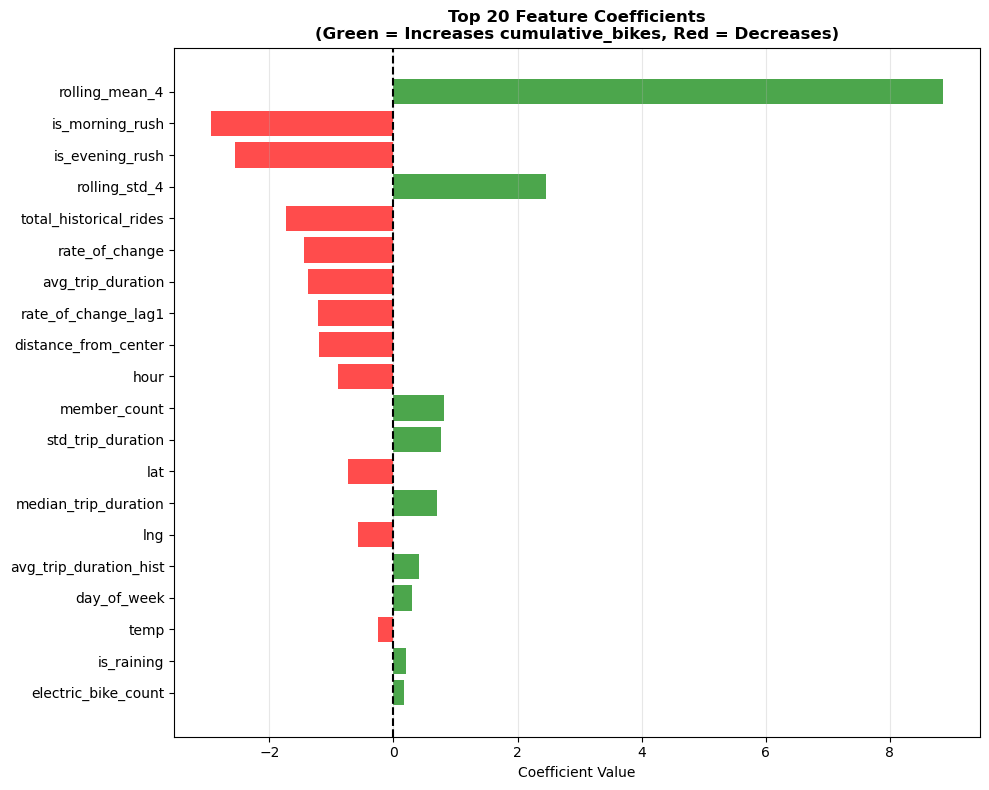

In [ ]:
# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Use X,
    'coefficient': baseline.coef_ 
})
# Add absolute value for ranking
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
# Sort
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

# Display top 20
print("\nTop 20 most influential features:")
print(feature_importance.head(20)[['feature', 'coefficient']].to_string(index=False))

# Visualize
import matplotlib.pyplot as plt

top_20 = feature_importance.head(20)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in top_20['coefficient']]
plt.barh(range(len(top_20)), top_20['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_20)), top_20['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Feature Coefficients\n(Green = Increases cumulative_bikes, Red = Decreases)', 
          fontweight='bold', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

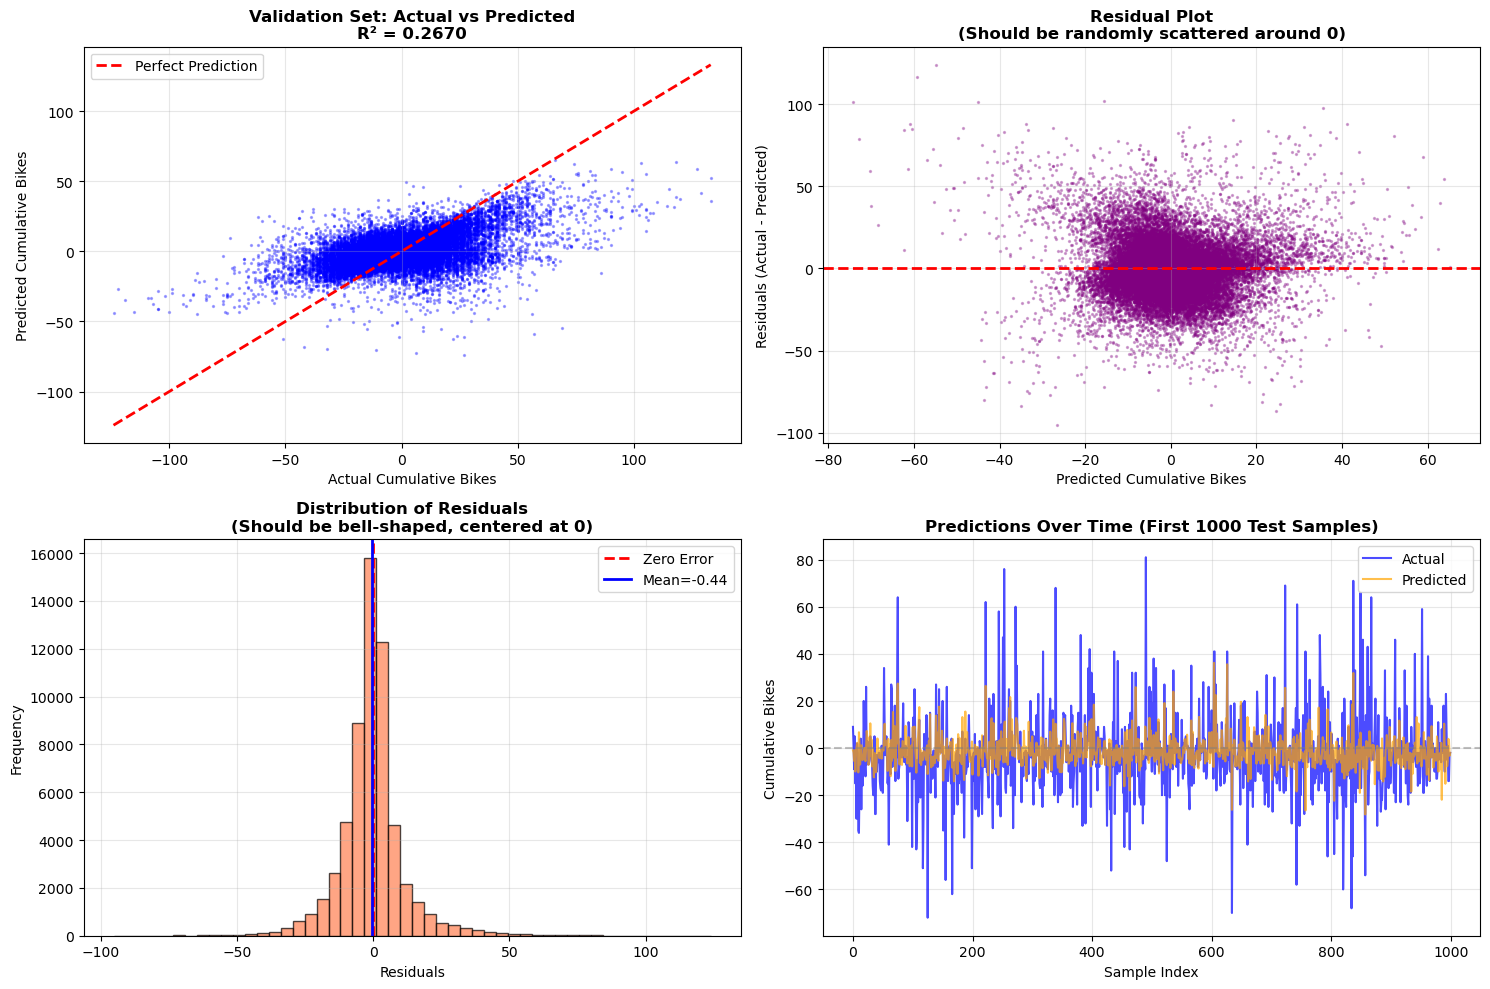

In [ ]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Actual vs Predicted (Validation Set)
axes[0, 0].scatter(y_val, y_val_pred, alpha=0.3, s=2, color='blue')
axes[0, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Cumulative Bikes', fontsize=10)
axes[0, 0].set_ylabel('Predicted Cumulative Bikes', fontsize=10)
axes[0, 0].set_title(f'Validation Set: Actual vs Predicted\nR² = {val_metrics["r2"]:.4f}', 
                     fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals Plot
residuals_test = y_val.values - y_val_pred
axes[0, 1].scatter(y_val_pred, residuals_test, alpha=0.3, s=2, color='purple')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Cumulative Bikes', fontsize=10)
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)', fontsize=10)
axes[0, 1].set_title('Residual Plot\n(Should be randomly scattered around 0)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Distribution
axes[1, 0].hist(residuals_test, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 0].axvline(x=residuals_test.mean(), color='blue', linestyle='-', lw=2, 
                   label=f'Mean={residuals_test.mean():.2f}')
axes[1, 0].set_xlabel('Residuals', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].set_title('Distribution of Residuals\n(Should be bell-shaped, centered at 0)', 
                     fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Predictions Over Time (Sample)
sample_size = min(1000, len(y_val))
sample_idx = y_val.index[:sample_size]

axes[1, 1].plot(range(len(sample_idx)), y_val.loc[sample_idx], 
                label='Actual', alpha=0.7, linewidth=1.5, color='blue')
axes[1, 1].plot(range(len(sample_idx)), 
                pd.Series(y_val_pred, index=y_val.index).loc[sample_idx], 
                label='Predicted', alpha=0.7, linewidth=1.5, color='orange')
axes[1, 1].axhline(y=0, linestyle='--', color='gray', alpha=0.5)
axes[1, 1].set_xlabel('Sample Index', fontsize=10)
axes[1, 1].set_ylabel('Cumulative Bikes', fontsize=10)
axes[1, 1].set_title(f'Predictions Over Time (First {sample_size} Test Samples)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

print("="*60)
print("NAIVE BAYES MODEL FOR DEMAND PREDICTION")
print("="*60)

# Use the same train/val/test splits as Linear Regression
# X_train_scaled, X_val_scaled, y_train, y_val are already defined

print("\nPreparing data for Naive Bayes...")

# Create bins for the target variable (convert regression to classification)
# Use quantile-based binning for balanced classes
n_bins = 10
y_train_binned, bin_edges = pd.qcut(y_train, q=n_bins, labels=False, retbins=True, duplicates='drop')
print(f"✅ Target variable binned into {len(bin_edges)-1} classes")
print(f"   Bin edges: {bin_edges}")

# Initialize and train Naive Bayes
nb_model = GaussianNB()

print("\nTraining Naive Bayes model...")
nb_model.fit(X_train_scaled, y_train_binned)
print("✅ Naive Bayes model trained!")

# Predict (returns class labels)
y_train_pred_class = nb_model.predict(X_train_scaled)
y_val_pred_class = nb_model.predict(X_val_scaled)

# Convert class predictions back to continuous values (use bin centers)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
y_train_pred_nb = bin_centers[y_train_pred_class]
y_val_pred_nb = bin_centers[y_val_pred_class]

print("✅ Predictions generated for train and validation sets")

# Evaluate Naive Bayes Model
print("\n" + "="*60)
print("NAIVE BAYES MODEL PERFORMANCE")
print("="*60)

train_metrics_nb = evaluate_model(y_train, y_train_pred_nb, "TRAIN")
val_metrics_nb = evaluate_model(y_val, y_val_pred_nb, "VALIDATION")

# Overfitting check
print("\n" + "="*60)
print("OVERFITTING CHECK")
print("="*60)

r2_diff = train_metrics_nb['r2'] - val_metrics_nb['r2']
print(f"R² difference (Train - Validation): {r2_diff:.4f}")

if r2_diff < 0.05:
    print("✅ No significant overfitting detected")
elif r2_diff < 0.15:
    print("⚠️  Slight overfitting")
else:
    print("❌ Significant overfitting - model memorizing training data")

# Compare with Linear Regression
print("\n" + "="*60)
print("MODEL COMPARISON: NAIVE BAYES vs LINEAR REGRESSION")
print("="*60)

comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'MAE', 'MAPE (%)'],
    'Linear Regression (Train)': [train_metrics['r2'], train_metrics['rmse'], train_metrics['mae'], 
                                   train_metrics.get('mape', np.nan)],
    'Naive Bayes (Train)': [train_metrics_nb['r2'], train_metrics_nb['rmse'], train_metrics_nb['mae'],
                             train_metrics_nb.get('mape', np.nan)],
    'Linear Regression (Val)': [val_metrics['r2'], val_metrics['rmse'], val_metrics['mae'],
                                 val_metrics.get('mape', np.nan)],
    'Naive Bayes (Val)': [val_metrics_nb['r2'], val_metrics_nb['rmse'], val_metrics_nb['mae'],
                           val_metrics_nb.get('mape', np.nan)]
})

print("\n", comparison_df.to_string(index=False))

# Determine winner
if val_metrics_nb['r2'] > val_metrics['r2']:
    print("\n🏆 Naive Bayes performs BETTER on validation set!")
else:
    print("\n🏆 Linear Regression performs BETTER on validation set!")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Actual vs Predicted (Validation Set)
axes[0, 0].scatter(y_val, y_val_pred_nb, alpha=0.3, s=2, color='orange')
axes[0, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Cumulative Bikes', fontsize=10)
axes[0, 0].set_ylabel('Predicted Cumulative Bikes', fontsize=10)
axes[0, 0].set_title(f'Naive Bayes - Validation Set: Actual vs Predicted\nR² = {val_metrics_nb["r2"]:.4f}', 
                     fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals Plot
residuals_val_nb = y_val.values - y_val_pred_nb
axes[0, 1].scatter(y_val_pred_nb, residuals_val_nb, alpha=0.3, s=2, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Cumulative Bikes', fontsize=10)
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)', fontsize=10)
axes[0, 1].set_title('Naive Bayes - Residual Plot', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Distribution
axes[1, 0].hist(residuals_val_nb, bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 0].axvline(x=residuals_val_nb.mean(), color='blue', linestyle='-', lw=2, 
                   label=f'Mean={residuals_val_nb.mean():.2f}')
axes[1, 0].set_xlabel('Residuals', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].set_title('Naive Bayes - Distribution of Residuals', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Predictions Over Time (Sample)
sample_size = min(1000, len(y_val))
sample_idx = y_val.index[:sample_size]

axes[1, 1].plot(range(len(sample_idx)), y_val.loc[sample_idx], 
                label='Actual', alpha=0.7, linewidth=1.5, color='blue')
axes[1, 1].plot(range(len(sample_idx)), 
                pd.Series(y_val_pred_nb, index=y_val.index).loc[sample_idx], 
                label='Naive Bayes', alpha=0.7, linewidth=1.5, color='orange')
axes[1, 1].axhline(y=0, linestyle='--', color='gray', alpha=0.5)
axes[1, 1].set_xlabel('Sample Index', fontsize=10)
axes[1, 1].set_ylabel('Cumulative Bikes', fontsize=10)
axes[1, 1].set_title(f'Naive Bayes - Predictions Over Time (First {sample_size} Val Samples)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression
ax1.scatter(y_val, y_val_pred, alpha=0.3, s=2, color='blue')
ax1.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Cumulative Bikes')
ax1.set_ylabel('Predicted Cumulative Bikes')
ax1.set_title(f'Linear Regression\nR² = {val_metrics["r2"]:.4f}, RMSE = {val_metrics["rmse"]:.2f}', 
              fontweight='bold')
ax1.grid(True, alpha=0.3)

# Naive Bayes
ax2.scatter(y_val, y_val_pred_nb, alpha=0.3, s=2, color='orange')
ax2.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Cumulative Bikes')
ax2.set_ylabel('Predicted Cumulative Bikes')
ax2.set_title(f'Naive Bayes\nR² = {val_metrics_nb["r2"]:.4f}, RMSE = {val_metrics_nb["rmse"]:.2f}', 
              fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.suptitle('Model Comparison: Linear Regression vs Naive Bayes', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✅ Naive Bayes model evaluation complete!")

NAIVE BAYES MODEL FOR DEMAND PREDICTION

Preparing data for Naive Bayes...


NameError: name 'y_train' is not defined